<a href="https://colab.research.google.com/github/RgomezRo/Supervised-Learning/blob/master/MICROSOFT_MALWARE_PREDICTION_DRAFT_VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROSOFT MALWARE PREDICTION


## Importar librerías

In [ ]:
#@title Importación de librerías y configuración límites colab { display-mode: "form" }
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Importar datos

In [ ]:
#@title Importación de datos de infecciones { display-mode: "form" }
url1 = '/content/drive/MyDrive/01. Data science/000_DATA_SAMPLES/sample_mmp.csv' #@param {type:"string"}
data = pd.read_csv(url1, index_col=0)


In [ ]:
#@title Visualización de datos
data.head()

MachineIdentifier   ProductName EngineVersion  \
8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
236059   06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

              AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
8427007  4.18.1807.18075  1.273.1234.0     0.0               7.0   
8829090  4.18.1807.18075  1.273.1282.0     0.0               7.0   
2731904   4.9.10586.1106   1.273.781.0     0.0               7.0   
1359513  4.18.1807.18075  1.275.1639.0     0.0               7.0   
236059   4.18.1807.18075   1.275.511.0     0.0               7.0   

         IsSxsPassiveMode  DefaultBrowsersIdentifier  \
8427007               0.0                        NaN   
8829090               0.0                        NaN   
2731904               0.0                        NaN   
1359513               0.0                        NaN   
236059                0.0                        NaN   

         AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
8427007                    53447.0                  1.0                1.0   
8829090                    53447.0                  1.0                1.0   
2731904                    46781.0                  2.0                1.0   
1359513                    53447.0                  1.0                1.0   
236059                     47238.0                  2.0                1.0   

         HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
8427007     1.0                8.0         85219.0                     NaN   
8829090     1.0              129.0         54198.0                     NaN   
2731904     1.0              149.0        122689.0                    27.0   
1359513     1.0              164.0        114587.0                    27.0   
236059      1.0              207.0         72421.0                    27.0   

         GeoNameIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
8427007              205.0                        172.0  windows10       x64   
8829090              126.0                        124.0  windows10       x64   
2731904              181.0                         56.0  windows10       x64   
1359513              205.0                        172.0  windows10       x64   
236059               277.0                         75.0  windows10       x64   

            OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
8427007  10.0.0.0  17134.0    256.0                  rs4   
8829090  10.0.0.0  17134.0    256.0                  rs4   
2731904  10.0.0.0  10586.0    768.0                  th2   
1359513  10.0.0.0  17134.0    768.0                  rs4   
236059   10.0.0.0  17134.0    256.0                  rs4   

                                              OsBuildLab SkuEdition  \
8427007         17134.1.amd64fre.rs4_release.180410-1804        Pro   
8829090         17134.1.amd64fre.rs4_release.180410-1804        Pro   
2731904  10586.1176.amd64fre.th2_release_sec.170913-1848       Home   
1359513         17134.1.amd64fre.rs4_release.180410-1804       Home   
236059          17134.1.amd64fre.rs4_release.180410-1804        Pro   

         IsProtected  AutoSampleOptIn PuaMode  SMode  IeVerIdentifier  \
8427007          1.0              0.0     NaN    0.0            137.0   
8829090          1.0              0.0     NaN    0.0            137.0   
2731904          1.0              0.0     NaN    0.0             74.0   
1359513          1.0              0.0     NaN    0.0            137.0   
236059           1.0              0.0     NaN    0.0            137.0   

          SmartScreen  Firewall  UacLuaenable Census_MDC2FormFactor  \
8427007  RequireAdmin       1.0           1.0               Desktop   
8829090  RequireAdmin       1.0           1.0      

In [ ]:
#@title
data.shape

(5587, 83)

# MLC 2: Data Understanding


## 2.1.1. Tamaño del dataset



In [ ]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 8427007 to 7353236
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(53), object(30)
memory usage: 3.6+ MB


## 2.1.2 Visualización directa de los datos


In [ ]:
data.head().T



8427007  \
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                  0.0   
RtpStateBitfield                                                                        7.0   
IsSxsPassiveMode                                                                        0.0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                           53447.0   
AVProductsInstalled                                                                     1.0   
AVProductsEnabled                                                                       1.0   
HasTpm                                                                                  1.0   
CountryIdentifier                                                                       8.0   
CityIdentifier                                                                      85219.0   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                     205.0   
LocaleEnglishNameIdentifier                                                           172.0   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                             17134.0   
OsSuite                                                                               256.0   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                             1.0   
AutoSampleOptIn                                                                         0.0   
PuaMode                                                                                 NaN   
SMode                                                                                   0.0   
IeVerIdentifier                                                                       137.0   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                                1.0   
UacLuaenable                                                                            1.0   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                             1443.0   
Census_OEMModelIdentifier                                                          275891.0   
Census_ProcessorCoreCount                                                               4.0   
Census_ProcessorManufacturerIdentifier                                                  5.0   
Census_ProcessorModelIdentifier                                                      2273.0   
Census_ProcessorClass                                                                   NaN   

In [ ]:
TARGET = "HasDetections"

## 2.1.3 Tipos de atributos

In [ ]:
data.shape


(5587, 83)

In [ ]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 8427007 to 7353236
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  5587 non-null   object 
 1   ProductName                                        5587 non-null   object 
 2   EngineVersion                                      5587 non-null   object 
 3   AppVersion                                         5587 non-null   object 
 4   AvSigVersion                                       5586 non-null   object 
 5   IsBeta                                             5586 non-null   float64
 6   RtpStateBitfield                                   5562 non-null   float64
 7   IsSxsPassiveMode                                   5586 non-null   float64
 8   DefaultBrowsersIdentifier                          251 non-null    float64
 9  

## 2.1.4 Estádisticos descriptivos 
Revisión General
Revisamos los tipos en las columnas


### Análisis numérico

In [ ]:
data
data.describe(include = np.number).T

count          mean  \
IsBeta                                             5586.0  0.000000e+00   
RtpStateBitfield                                   5562.0  6.839986e+00   
IsSxsPassiveMode                                   5586.0  1.897601e-02   
DefaultBrowsersIdentifier                           251.0  1.555490e+03   
AVProductStatesIdentifier                          5567.0  4.775718e+04   
AVProductsInstalled                                5567.0  1.327825e+00   
AVProductsEnabled                                  5567.0  1.022094e+00   
HasTpm                                             5586.0  9.896169e-01   
CountryIdentifier                                  5586.0  1.097152e+02   
CityIdentifier                                     5385.0  8.129059e+04   
OrganizationIdentifier                             3905.0  2.496184e+01   
GeoNameIdentifier                                  5586.0  1.696529e+02   
LocaleEnglishNameIdentifier                        5586.0  1.248398e+02   
OsBuild                                            5586.0  1.581422e+04   
OsSuite                                            5586.0  5.734826e+02   
IsProtected                                        5567.0  9.475481e-01   
AutoSampleOptIn                                    5586.0  0.000000e+00   
SMode                                              5263.0  1.900057e-04   
IeVerIdentifier                                    5551.0  1.262612e+02   
Firewall                                           5539.0  9.790576e-01   
UacLuaenable                                       5582.0  9.955213e-01   
Census_OEMNameIdentifier                           5532.0  2.222128e+03   
Census_OEMModelIdentifier                          5528.0  2.405193e+05   
Census_ProcessorCoreCount                          5557.0  3.985784e+00   
Census_ProcessorManufacturerIdentifier             5557.0  4.539320e+00   
Census_ProcessorModelIdentifier                    5557.0  2.371320e+03   
Census_PrimaryDiskTotalCapacity                    5549.0  5.195013e+05   
Census_SystemVolumeTotalCapacity                   5549.0  3.847976e+05   
Census_HasOpticalDiskDrive                         5586.0  7.250269e-02   
Census_TotalPhysicalRAM                            5526.0  6.132463e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  5563.0  1.674598e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  5563.0  1.547764e+03   
Census_InternalPrimaryDisplayResolutionVertical    5563.0  8.966948e+02   
Census_InternalBatteryNumberOfCharges              5417.0  1.161552e+09   
Census_OSBuildNumber                               5586.0  1.592188e+04   
Census_OSBuildRevision                             5586.0  9.591276e+02   
Census_OSInstallLanguageIdentifier                 5556.0  1.463157e+01   
Census_OSUILocaleIdentifier                        5586.0  6.059828e+01   
Census_IsPortableOperatingSystem                   5586.0  3.580380e-04   
Census_IsFlightingInternal                          964.0  0.000000e+00   
Census_IsFlightsDisabled                           5495.0  0.000000e+00   
Census_ThresholdOptIn                              2030.0  0.000000e+00   
Census_FirmwareManufacturerIdentifier              5465.0  3.979672e+02   
Census_FirmwareVersionIdentifier                   5477.0  3.320019e+04   
Census_IsSecureBootEnabled                         5586.0  4.815610e-01   
Census_IsWIMBootEnabled                            2033.0  0.000000e+00   
Census_IsVirtualDevice                             5576.0  6.456241e-03   
Census_IsTouchEnabled                              5586.0  1.233441e-01   
Census_IsPenCapable                                5586.0  3.687791e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            5528.0  5.318379e-02   
Wdft_IsGamer                                       5410.0  2.826248e-01   
Wdft_RegionIdentifier                              5410.0  7.900739e+00   
HasDetections                                      5586.0  5.007161e-01   

 

#### Segunda observación : Valores numéricos a cero
Algunos valores vienen completamente vacíos a pesar de no ser nulos. Podemos sacarlos fácilmente



In [ ]:
data.describe(include = np.number).T[data.describe(include = np.number).T["mean"]==0]

count  mean  std  min  25%  50%  75%  max
IsBeta                      5586.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AutoSampleOptIn             5586.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Census_IsFlightingInternal   964.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Census_IsFlightsDisabled    5495.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Census_ThresholdOptIn       2030.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Census_IsWIMBootEnabled     2033.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
cols_to_drop = data.describe(include = np.number).T[data.describe(include = np.number).T["mean"]==0].index.array
print(cols_to_drop)

<PandasArray>
[                    'IsBeta',            'AutoSampleOptIn',
 'Census_IsFlightingInternal',   'Census_IsFlightsDisabled',
      'Census_ThresholdOptIn',    'Census_IsWIMBootEnabled']
Length: 6, dtype: object


Por claridad,procedemos a la eliminación de dichos atributos ya que no aportan nada a la predicción

In [ ]:
data= data.drop(columns=cols_to_drop)

#### Tercera observación : Valores categóricos como numéricos

Valores categóricos como numéricos

In [ ]:
data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 8427007 to 7353236
Columns: 77 entries, MachineIdentifier to HasDetections
dtypes: float64(47), object(30)
memory usage: 3.3+ MB


In [ ]:
data.select_dtypes(include=['float64']).head().T.head()

8427007  8829090  2731904  1359513  236059 
RtpStateBitfield               7.0      7.0      7.0      7.0      7.0
IsSxsPassiveMode               0.0      0.0      0.0      0.0      0.0
DefaultBrowsersIdentifier      NaN      NaN      NaN      NaN      NaN
AVProductStatesIdentifier  53447.0  53447.0  46781.0  53447.0  47238.0
AVProductsInstalled            1.0      1.0      2.0      1.0      2.0

Por claridad se ha limitado el número de columnas, pero se ve claramente que hay muchos identificadores , versiones y builds que se consideran como numéricos cuando no deberían.
Posteriormente deberemos tratarlos como valores discretos convirtiendólos en string y analizando a partir de aquí.

El uso de distinto software (o versiones del mismo) puede influir en las vulnerabilidades de dicho software. La versión o el build nos indica a qué major release o minor release pertenece y si alguna vulnerabilidad ha incidido en la infección del equipo.


In [ ]:
data.head().select_dtypes(include=['float64']).filter(regex='Version|Build|Identifier').T

8427007   8829090   2731904  \
DefaultBrowsersIdentifier                    NaN       NaN       NaN   
AVProductStatesIdentifier                53447.0   53447.0   46781.0   
CountryIdentifier                            8.0     129.0     149.0   
CityIdentifier                           85219.0   54198.0  122689.0   
OrganizationIdentifier                       NaN       NaN      27.0   
GeoNameIdentifier                          205.0     126.0     181.0   
LocaleEnglishNameIdentifier                172.0     124.0      56.0   
OsBuild                                  17134.0   17134.0   10586.0   
IeVerIdentifier                            137.0     137.0      74.0   
Census_OEMNameIdentifier                  1443.0    2102.0    2206.0   
Census_OEMModelIdentifier               275891.0  248850.0  238234.0   
Census_ProcessorManufacturerIdentifier       5.0       5.0       5.0   
Census_ProcessorModelIdentifier           2273.0    2660.0    2998.0   
Census_OSBuildNumber                     17134.0   17134.0   10586.0   
Census_OSBuildRevision                     165.0     165.0    1176.0   
Census_OSInstallLanguageIdentifier          27.0      18.0      24.0   
Census_OSUILocaleIdentifier                120.0      72.0     109.0   
Census_FirmwareManufacturerIdentifier      355.0     486.0     554.0   
Census_FirmwareVersionIdentifier         19951.0   48753.0   33111.0   
Wdft_RegionIdentifier                       11.0       3.0      15.0   

                                         1359513   236059   
DefaultBrowsersIdentifier                    NaN       NaN  
AVProductStatesIdentifier                53447.0   47238.0  
CountryIdentifier                          164.0     207.0  
CityIdentifier                          114587.0   72421.0  
OrganizationIdentifier                      27.0      27.0  
GeoNameIdentifier                          205.0     277.0  
LocaleEnglishNameIdentifier                172.0      75.0  
OsBuild                                  17134.0   17134.0  
IeVerIdentifier                            137.0     137.0  
Census_OEMNameIdentifier                   525.0    1443.0  
Census_OEMModelIdentifier               265410.0  256478.0  
Census_ProcessorManufacturerIdentifier       5.0       1.0  
Census_ProcessorModelIdentifier           2880.0     198.0  
Census_OSBuildNumber                     17134.0   17134.0  
Census_OSBuildRevision                     286.0     228.0  
Census_OSInstallLanguageIdentifier          27.0       8.0  
Census_OSUILocaleIdentifier                120.0      31.0  
Census_FirmwareManufacturerIdentifier      142.0     355.0  
Census_FirmwareVersionIdentifier         48473.0    4343.0  
Wdft_RegionIdentifier                       15.0      13.0

Convertimos pues todas estas columnas a variables categóricas

In [ ]:
cols_to_convert = data.head().select_dtypes(include=['float64']).filter(regex='Version|Build|Identifier').T.index.array
display(cols_to_convert)
dict_cols_and_types = {}
for key in cols_to_convert:
  dict_cols_and_types.update({key:"object"})
data=data.astype(dict_cols_and_types)

<PandasArray>
[             'DefaultBrowsersIdentifier',
              'AVProductStatesIdentifier',
                      'CountryIdentifier',
                         'CityIdentifier',
                 'OrganizationIdentifier',
                      'GeoNameIdentifier',
            'LocaleEnglishNameIdentifier',
                                'OsBuild',
                        'IeVerIdentifier',
               'Census_OEMNameIdentifier',
              'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
        'Census_ProcessorModelIdentifier',
                   'Census_OSBuildNumber',
                 'Census_OSBuildRevision',
     'Census_OSInstallLanguageIdentifier',
            'Census_OSUILocaleIdentifier',
  'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier',
                  'Wdft_RegionIdentifier']
Length: 20, dtype: object

Vemos como ya, al menos, no aparecen los identificadores como numéricos

In [ ]:
data.head().select_dtypes(include=['float64']).filter(regex='Version|Build|Identifier').T

Empty DataFrame
Columns: [8427007, 8829090, 2731904, 1359513, 236059]
Index: []

Si quitamos las columnas con todo a cero y las categóricas, nos quedarían solo las numéricas

In [ ]:


data.head(10)[data.select_dtypes(include=['float64']).T.index].describe().T

count          mean  \
RtpStateBitfield                                    10.0  7.000000e+00   
IsSxsPassiveMode                                    10.0  0.000000e+00   
AVProductsInstalled                                 10.0  1.600000e+00   
AVProductsEnabled                                   10.0  1.000000e+00   
HasTpm                                              10.0  1.000000e+00   
OsSuite                                             10.0  5.632000e+02   
IsProtected                                         10.0  1.000000e+00   
SMode                                               10.0  0.000000e+00   
Firewall                                            10.0  1.000000e+00   
UacLuaenable                                        10.0  1.000000e+00   
Census_ProcessorCoreCount                           10.0  4.200000e+00   
Census_PrimaryDiskTotalCapacity                     10.0  4.716143e+05   
Census_SystemVolumeTotalCapacity                    10.0  4.540643e+05   
Census_HasOpticalDiskDrive                          10.0  1.000000e-01   
Census_TotalPhysicalRAM                             10.0  5.939200e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches   10.0  1.544000e+01   
Census_InternalPrimaryDisplayResolutionHorizontal   10.0  1.617400e+03   
Census_InternalPrimaryDisplayResolutionVertical     10.0  9.240000e+02   
Census_InternalBatteryNumberOfCharges               10.0  4.294968e+08   
Census_IsPortableOperatingSystem                    10.0  0.000000e+00   
Census_IsSecureBootEnabled                          10.0  5.000000e-01   
Census_IsVirtualDevice                              10.0  0.000000e+00   
Census_IsTouchEnabled                               10.0  2.000000e-01   
Census_IsPenCapable                                 10.0  1.000000e-01   
Census_IsAlwaysOnAlwaysConnectedCapable             10.0  0.000000e+00   
Wdft_IsGamer                                        10.0  2.000000e-01   
HasDetections                                       10.0  6.000000e-01   

                                                            std       min  \
RtpStateBitfield                                   0.000000e+00       7.0   
IsSxsPassiveMode                                   0.000000e+00       0.0   
AVProductsInstalled                                6.992059e-01       1.0   
AVProductsEnabled                                  0.000000e+00       1.0   
HasTpm                                             0.000000e+00       1.0   
OsSuite                                            2.643957e+02     256.0   
IsProtected                                        0.000000e+00       1.0   
SMode                                              0.000000e+00       0.0   
Firewall                                           0.000000e+00       1.0   
UacLuaenable                                       0.000000e+00       1.0   
Census_ProcessorCoreCount                          1.475730e+00       2.0   
Census_PrimaryDiskTotalCapacity                    2.839604e+05  122104.0   
Census_SystemVolumeTotalCapacity                   2.865792e+05  121493.0   
Census_HasOpticalDiskDrive                         3.162278e-01       0.0   
Census_TotalPhysicalRAM                            2.451905e+03    2048.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches  2.963556e+00      12.0   
Census_InternalPrimaryDisplayResolutionHorizontal  3.614736e+02    1280.0   
Census_InternalPrimaryDisplayResolutionVertical    2.363049e+02     720.0   
Census_InternalBatteryNumberOfCharges              1.358188e+09       0.0   
Census_IsPortableOperatingSystem                   0.000000e+00       0.0   
Census_IsSecureBootEnabled                         5.270463e-01       0.0   
Census_IsVirtualDevice                             0.000000e+00       0.0   
Census_IsTouchEnabled                              4.216370e-01       0.0   
Census_IsPenCapable                                3.162278e-01       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable            0.

Vemos que también hay booleanos por lo que podríamos convertirlos
Vemos patrones en las medidas de dichas columnas (maximos , minimos,etc) con los que podemos identificar los booleanos, procedemos a ello:


In [ ]:

aux_bool_set= data.select_dtypes(include=['float64']).describe().T
aux_bool_set= aux_bool_set[((aux_bool_set["min"]==0 )|( aux_bool_set["min"]==1))&((aux_bool_set["25%"]==0 )|( aux_bool_set["25%"]==1))&((aux_bool_set["50%"]==0 )|( aux_bool_set["50%"]==1))&((aux_bool_set["max"]==0 )|( aux_bool_set["max"]==1))]
display(aux_bool_set)
boolean_columns = aux_bool_set.index.array

count      mean       std  min  25%  \
IsSxsPassiveMode                         5586.0  0.018976  0.136452  0.0  0.0   
HasTpm                                   5586.0  0.989617  0.101376  0.0  1.0   
IsProtected                              5567.0  0.947548  0.222957  0.0  1.0   
SMode                                    5263.0  0.000190  0.013784  0.0  0.0   
Firewall                                 5539.0  0.979058  0.143204  0.0  1.0   
UacLuaenable                             5582.0  0.995521  0.066779  0.0  1.0   
Census_HasOpticalDiskDrive               5586.0  0.072503  0.259342  0.0  0.0   
Census_IsPortableOperatingSystem         5586.0  0.000358  0.018920  0.0  0.0   
Census_IsSecureBootEnabled               5586.0  0.481561  0.499705  0.0  0.0   
Census_IsVirtualDevice                   5576.0  0.006456  0.080098  0.0  0.0   
Census_IsTouchEnabled                    5586.0  0.123344  0.328861  0.0  0.0   
Census_IsPenCapable                      5586.0  0.036878  0.188479  0.0  0.0   
Census_IsAlwaysOnAlwaysConnectedCapable  5528.0  0.053184  0.224420  0.0  0.0   
Wdft_IsGamer                             5410.0  0.282625  0.450317  0.0  0.0   
HasDetections                            5586.0  0.500716  0.500044  0.0  0.0   

                                         50%  75%  max  
IsSxsPassiveMode                         0.0  0.0  1.0  
HasTpm                                   1.0  1.0  1.0  
IsProtected                              1.0  1.0  1.0  
SMode                                    0.0  0.0  1.0  
Firewall                                 1.0  1.0  1.0  
UacLuaenable                             1.0  1.0  1.0  
Census_HasOpticalDiskDrive               0.0  0.0  1.0  
Census_IsPortableOperatingSystem         0.0  0.0  1.0  
Census_IsSecureBootEnabled               0.0  1.0  1.0  
Census_IsVirtualDevice                   0.0  0.0  1.0  
Census_IsTouchEnabled                    0.0  0.0  1.0  
Census_IsPenCapable                      0.0  0.0  1.0  
Census_IsAlwaysOnAlwaysConnectedCapable  0.0  0.0  1.0  
Wdft_IsGamer                             0.0  1.0  1.0  
HasDetections                            1.0  1.0  1.0

In [ ]:
data[boolean_columns].isnull().sum()

IsSxsPassiveMode                             1
HasTpm                                       1
IsProtected                                 20
SMode                                      324
Firewall                                    48
UacLuaenable                                 5
Census_HasOpticalDiskDrive                   1
Census_IsPortableOperatingSystem             1
Census_IsSecureBootEnabled                   1
Census_IsVirtualDevice                      11
Census_IsTouchEnabled                        1
Census_IsPenCapable                          1
Census_IsAlwaysOnAlwaysConnectedCapable     59
Wdft_IsGamer                               177
HasDetections                                1
dtype: int64

In [ ]:
display(boolean_columns)
dict_cols_and_types = {}

## lo transformamos a objeto para luego tratar los nulos 
for key in boolean_columns:
  dict_cols_and_types.update({key:"object"})

data=data.astype(dict_cols_and_types)



<PandasArray>
[                       'IsSxsPassiveMode',
                                  'HasTpm',
                             'IsProtected',
                                   'SMode',
                                'Firewall',
                            'UacLuaenable',
              'Census_HasOpticalDiskDrive',
        'Census_IsPortableOperatingSystem',
              'Census_IsSecureBootEnabled',
                  'Census_IsVirtualDevice',
                   'Census_IsTouchEnabled',
                     'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
                            'Wdft_IsGamer',
                           'HasDetections']
Length: 15, dtype: object

In [ ]:
data[boolean_columns].isnull().sum()

IsSxsPassiveMode                             1
HasTpm                                       1
IsProtected                                 20
SMode                                      324
Firewall                                    48
UacLuaenable                                 5
Census_HasOpticalDiskDrive                   1
Census_IsPortableOperatingSystem             1
Census_IsSecureBootEnabled                   1
Census_IsVirtualDevice                      11
Census_IsTouchEnabled                        1
Census_IsPenCapable                          1
Census_IsAlwaysOnAlwaysConnectedCapable     59
Wdft_IsGamer                               177
HasDetections                                1
dtype: int64

In [ ]:
data.select_dtypes(include=['float64']).head().T

8427007   8829090  \
RtpStateBitfield                                   7.000000e+00       7.0   
AVProductsInstalled                                1.000000e+00       1.0   
AVProductsEnabled                                  1.000000e+00       1.0   
OsSuite                                            2.560000e+02     256.0   
Census_ProcessorCoreCount                          4.000000e+00       4.0   
Census_PrimaryDiskTotalCapacity                    9.538690e+05  476940.0   
Census_SystemVolumeTotalCapacity                   9.528380e+05  457600.0   
Census_TotalPhysicalRAM                            8.192000e+03    8192.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches  2.300000e+01      13.2   
Census_InternalPrimaryDisplayResolutionHorizontal  1.920000e+03    1280.0   
Census_InternalPrimaryDisplayResolutionVertical    1.080000e+03     720.0   
Census_InternalBatteryNumberOfCharges              4.294967e+09       0.0   

                                                    2731904   1359513  \
RtpStateBitfield                                        7.0       7.0   
AVProductsInstalled                                     2.0       1.0   
AVProductsEnabled                                       1.0       1.0   
OsSuite                                               768.0     768.0   
Census_ProcessorCoreCount                               4.0       8.0   
Census_PrimaryDiskTotalCapacity                    244198.0  228936.0   
Census_SystemVolumeTotalCapacity                   221251.0  228321.0   
Census_TotalPhysicalRAM                              8192.0    8192.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches      15.5      15.5   
Census_InternalPrimaryDisplayResolutionHorizontal    1920.0    1920.0   
Census_InternalPrimaryDisplayResolutionVertical      1080.0    1080.0   
Census_InternalBatteryNumberOfCharges                   0.0     577.0   

                                                    236059   
RtpStateBitfield                                        7.0  
AVProductsInstalled                                     2.0  
AVProductsEnabled                                       1.0  
OsSuite                                               256.0  
Census_ProcessorCoreCount                               4.0  
Census_PrimaryDiskTotalCapacity                    476940.0  
Census_SystemVolumeTotalCapacity                   464374.0  
Census_TotalPhysicalRAM                              4096.0  
Census_InternalPrimaryDiagonalDisplaySizeInInches      15.5  
Census_InternalPrimaryDisplayResolutionHorizontal    1366.0  
Census_InternalPrimaryDisplayResolutionVertical       768.0  
Census_InternalBatteryNumberOfCharges                   0.0

Si observamos las variables que nos quedan , la única que, a primera vista, sigue sin ser numérica es la columna **OsSuite**. El resto son numéricas o booleanas. Aplicamos los cambios de formato correspondientes

In [ ]:
## transformar booleanos
data=data.astype({"AVProductsEnabled":"object"})
boolean_columns =np.append(boolean_columns,["AVProductsEnabled"])
print(boolean_columns)

['IsSxsPassiveMode' 'HasTpm' 'IsProtected' 'SMode' 'Firewall'
 'UacLuaenable' 'Census_HasOpticalDiskDrive'
 'Census_IsPortableOperatingSystem' 'Census_IsSecureBootEnabled'
 'Census_IsVirtualDevice' 'Census_IsTouchEnabled' 'Census_IsPenCapable'
 'Census_IsAlwaysOnAlwaysConnectedCapable' 'Wdft_IsGamer' 'HasDetections'
 'AVProductsEnabled']


In [ ]:
## transformar categoricos
data=data.astype({"OsSuite":"object"})

In [ ]:
data.select_dtypes(include=['float64']).head().T

8427007   8829090  \
RtpStateBitfield                                   7.000000e+00       7.0   
AVProductsInstalled                                1.000000e+00       1.0   
Census_ProcessorCoreCount                          4.000000e+00       4.0   
Census_PrimaryDiskTotalCapacity                    9.538690e+05  476940.0   
Census_SystemVolumeTotalCapacity                   9.528380e+05  457600.0   
Census_TotalPhysicalRAM                            8.192000e+03    8192.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches  2.300000e+01      13.2   
Census_InternalPrimaryDisplayResolutionHorizontal  1.920000e+03    1280.0   
Census_InternalPrimaryDisplayResolutionVertical    1.080000e+03     720.0   
Census_InternalBatteryNumberOfCharges              4.294967e+09       0.0   

                                                    2731904   1359513  \
RtpStateBitfield                                        7.0       7.0   
AVProductsInstalled                                     2.0       1.0   
Census_ProcessorCoreCount                               4.0       8.0   
Census_PrimaryDiskTotalCapacity                    244198.0  228936.0   
Census_SystemVolumeTotalCapacity                   221251.0  228321.0   
Census_TotalPhysicalRAM                              8192.0    8192.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches      15.5      15.5   
Census_InternalPrimaryDisplayResolutionHorizontal    1920.0    1920.0   
Census_InternalPrimaryDisplayResolutionVertical      1080.0    1080.0   
Census_InternalBatteryNumberOfCharges                   0.0     577.0   

                                                    236059   
RtpStateBitfield                                        7.0  
AVProductsInstalled                                     2.0  
Census_ProcessorCoreCount                               4.0  
Census_PrimaryDiskTotalCapacity                    476940.0  
Census_SystemVolumeTotalCapacity                   464374.0  
Census_TotalPhysicalRAM                              4096.0  
Census_InternalPrimaryDiagonalDisplaySizeInInches      15.5  
Census_InternalPrimaryDisplayResolutionHorizontal    1366.0  
Census_InternalPrimaryDisplayResolutionVertical       768.0  
Census_InternalBatteryNumberOfCharges                   0.0

### Análisis en catégoricos

In [ ]:
data.loc[:, ~data.columns.isin(boolean_columns)].describe(include = ["object"]).T

count  unique  \
MachineIdentifier                         5587    5587   
ProductName                               5587       2   
EngineVersion                             5587      31   
AppVersion                                5587      53   
AvSigVersion                              5586    1284   
DefaultBrowsersIdentifier                251.0    63.0   
AVProductStatesIdentifier               5567.0   346.0   
CountryIdentifier                       5586.0   182.0   
CityIdentifier                          5385.0  2383.0   
OrganizationIdentifier                  3905.0    22.0   
GeoNameIdentifier                       5586.0   153.0   
LocaleEnglishNameIdentifier             5586.0   121.0   
Platform                                  5586       4   
Processor                                 5586       2   
OsVer                                     5586       4   
OsBuild                                 5586.0    15.0   
OsSuite                                 5586.0     6.0   
OsPlatformSubRelease                      5586       9   
OsBuildLab                                5586     167   
SkuEdition                                5586       8   
PuaMode                                      1       1   
IeVerIdentifier                         5551.0    69.0   
SmartScreen                               3593       8   
Census_MDC2FormFactor                     5586      10   
Census_DeviceFamily                       5586       2   
Census_OEMNameIdentifier                5532.0   222.0   
Census_OEMModelIdentifier               5528.0  2650.0   
Census_ProcessorManufacturerIdentifier  5557.0     2.0   
Census_ProcessorModelIdentifier         5557.0   775.0   
Census_ProcessorClass                       15       3   
Census_PrimaryDiskTypeName                5577       4   
Census_ChassisTypeName                    5586      22   
Census_PowerPlatformRoleName              5586       8   
Census_InternalBatteryType                1601      14   
Census_OSVersion                          5586     168   
Census_OSArchitecture                     5586       2   
Census_OSBranch                           5586      12   
Census_OSBuildNumber                    5586.0    11.0   
Census_OSBuildRevision                  5586.0   160.0   
Census_OSEdition                          5586      17   
Census_OSSkuName                          5586      16   
Census_OSInstallTypeName                  5586       9   
Census_OSInstallLanguageIdentifier      5556.0    39.0   
Census_OSUILocaleIdentifier             5586.0    42.0   
Census_OSWUAutoUpdateOptionsName          5586       6   
Census_GenuineStateName                   5586       4   
Census_ActivationChannel                  5586       6   
Census_FlightRing                         5586       7   
Census_FirmwareManufacturerIdentifier   5465.0    60.0   
Census_FirmwareVersionIdentifier        5477.0  2371.0   
Wdft_RegionIdentifier                   5410.0    15.0   

                                                                             top  \
MachineIdentifier                               f1cd864e97bae82bdf96523e1a539121   
ProductName                                                         win8defender   
EngineVersion                                                        1.1.15200.1   
AppVersion                                                       4.18.1807.18075   
AvSigVersion                                                        1.273.1420.0   
DefaultBrowsersIdentifier                                                  239.0   
AVProductStatesIdentifier                                                53447.0   
CountryIdentifier                                                           43.0   
CityIdentifier                                                           16668.0   
OrganizationIdentifier                                                      27.0   
GeoNameIdentifier                                                          277.0   
LocaleEnglishNam

Observamos que **PuaMode** solo tiene un registro informado y que **MachineIdentifier** podría actuar como identificador

## 2.1.5 Análisis de nulos

In [ ]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 8427007 to 7353236
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  5587 non-null   object 
 1   ProductName                                        5587 non-null   object 
 2   EngineVersion                                      5587 non-null   object 
 3   AppVersion                                         5587 non-null   object 
 4   AvSigVersion                                       5586 non-null   object 
 5   RtpStateBitfield                                   5562 non-null   float64
 6   IsSxsPassiveMode                                   5586 non-null   object 
 7   DefaultBrowsersIdentifier                          251 non-null    object 
 8   AVProductStatesIdentifier                          5567 non-null   object 
 9  

#### Primera observación: Campos con valores nulos

Podemos observar que los siguientes campos contienen en su mayoría nulos (menos del 95 % de filas rellenas)



In [ ]:
data.count()[data.isnull().sum()>5000]

DefaultBrowsersIdentifier    251
PuaMode                        1
Census_ProcessorClass         15
dtype: int64

Vamos a observar la distribuición de las columnas en base a los nulos

In [ ]:

def analisisNulos(data, nombreDatos, filtro):

  nulos = pd.Series(data.isnull().count()[data.isnull().sum()>filtro])
  print("    ####  Análisis de nulos en columnas para:",nombreDatos,"###")
  print("    ###  Total de columnas con nulos:",nulos.size, "de" , len(data.columns), nombreDatos," ##")
  print("")
  no_nulos = pd.Series((data.count()[data.isnull().sum()>filtro]))  
  resultado = ((nulos/(nulos+no_nulos))*100).sort_values(ascending= False)



  df = pd.DataFrame(data=resultado)
  df.rename(columns={0:"Numero de columnas en este rango"},errors="raise",inplace=True)
  df['Discretizados'] = df['Numero de columnas en este rango'].map(lambda x: "[< 50.3 % nulos] " if (x < 50.3 ) else ("[50.3 < x < 55 % nulos]" if ((x < 55) )&( (x >= 50.3) ) else ("[< 65 % nulos]" if x<=65  else ( "[< 75 % nulos]" if x<=75 else ( "[< 80 % nulos]" if x<=80 else ( "[< 85 % nulos]" if x<=85 else ( "[> 85 % nulos]")))) )))

  print(df.groupby(['Discretizados']).count())
  print("")


  auxData = df.groupby(['Discretizados']).count().reset_index(inplace=True)

  sns.set_theme(style="darkgrid")

  # Set up the matplotlib figure
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))


  sns.barplot(x=df[:9].index, y=df[:9]["Numero de columnas en este rango"], ax=ax1)



  sns.countplot(x="Discretizados",data =df,  ax=ax2)

  ax2.set_ylabel("")
  ax2.set_xlabel("")
  ax2.set_title('Número de campos x rango de nulos en los '+  nombreDatos)
  ax1.set_ylabel("")
  ax2.set_xlabel("")
  ax1.set_title('Top 10 atributos con más nulos en los ' + nombreDatos)

  for item in ax2.get_xticklabels():
      item.set_rotation(70)

  for item in ax1.get_xticklabels():
      item.set_rotation(70)

  # Finalize the plot
  sns.despine(bottom=True)

  plt.tight_layout(h_pad=2)





    ####  Análisis de nulos en columnas para: Datos Globales ###
    ###  Total de columnas con nulos: 73 de 77 Datos Globales  ##

                         Numero de columnas en este rango
Discretizados                                            
[50.3 < x < 55 % nulos]                                 7
[< 50.3 % nulos]                                       60
[< 65 % nulos]                                          2
[< 80 % nulos]                                          1
[> 85 % nulos]                                          3



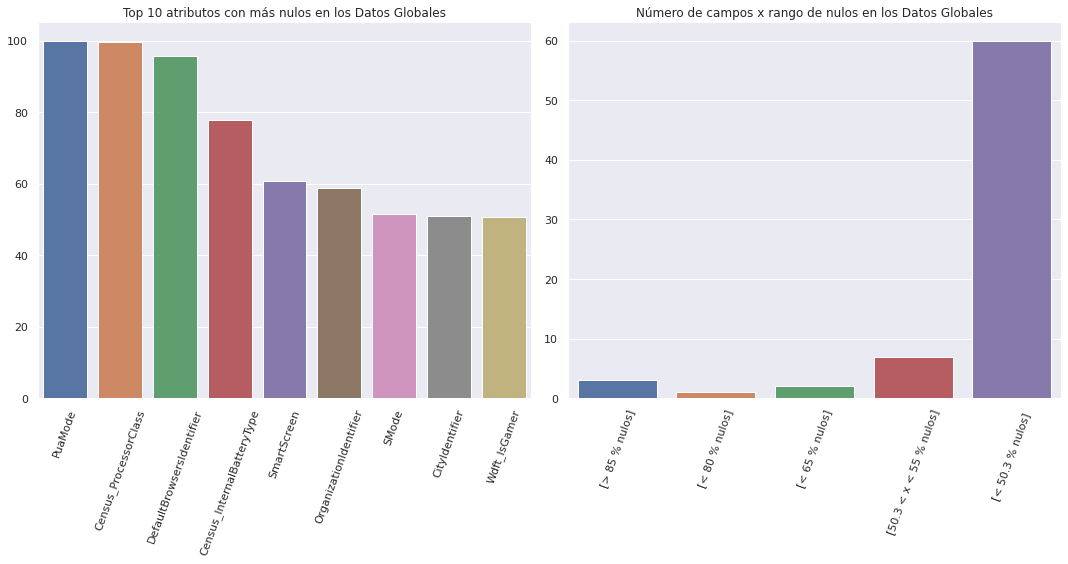

In [ ]:
analisisNulos(data,"Datos Globales",0)

### Análisis de nulos en categóricos

    ####  Análisis de nulos en columnas para: Datos Categóricos ###
    ###  Total de columnas con nulos: 47 de 51 Datos Categóricos  ##

                         Numero de columnas en este rango
Discretizados                                            
[50.3 < x < 55 % nulos]                                 4
[< 50.3 % nulos]                                       37
[< 65 % nulos]                                          2
[< 80 % nulos]                                          1
[> 85 % nulos]                                          3



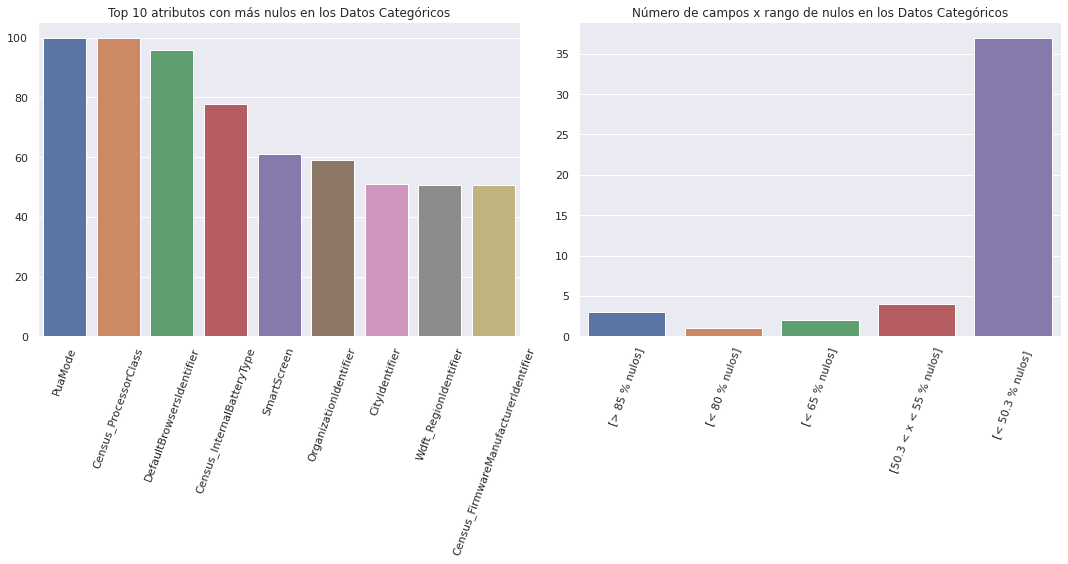

In [ ]:
analisisNulos(data.loc[:, ~data.columns.isin(boolean_columns)].select_dtypes(include=['object']),"Datos Categóricos",0)


### Análisis de nulos en numéricos

    ####  Análisis de nulos en columnas para: Datos Numéricos ###
    ###  Total de columnas con nulos: 10 de 10 Datos Numéricos  ##

                         Numero de columnas en este rango
Discretizados                                            
[50.3 < x < 55 % nulos]                                 1
[< 50.3 % nulos]                                        9



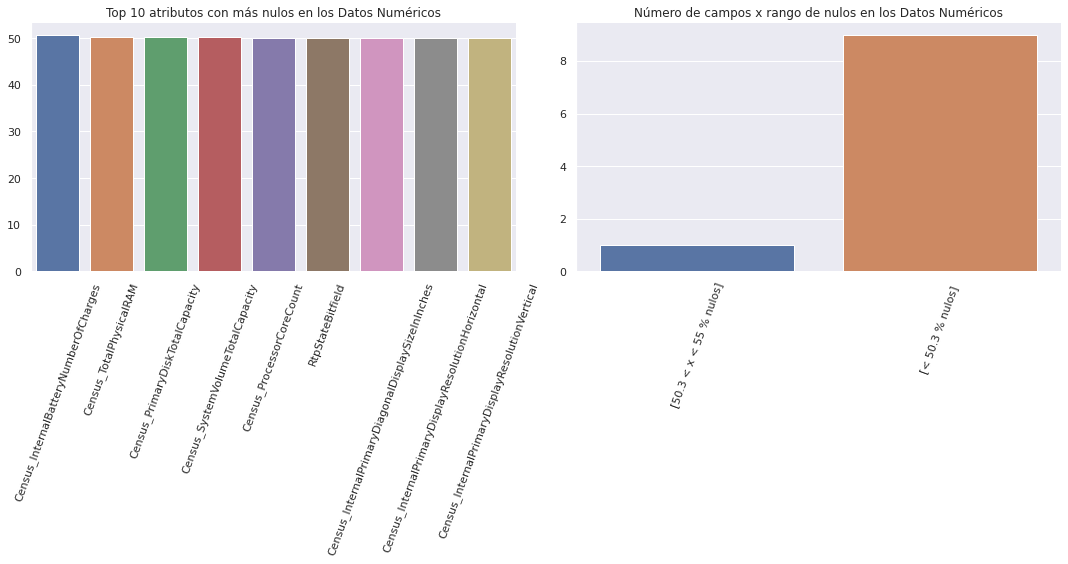

In [ ]:
analisisNulos(data.select_dtypes(include=['number']),"Datos Numéricos",0)

### Análisis de nulos en booleanos

    ####  Análisis de nulos en columnas para: Datos Categóricos ###
    ###  Total de columnas con nulos: 16 de 16 Datos Categóricos  ##

                         Numero de columnas en este rango
Discretizados                                            
[50.3 < x < 55 % nulos]                                 2
[< 50.3 % nulos]                                       14



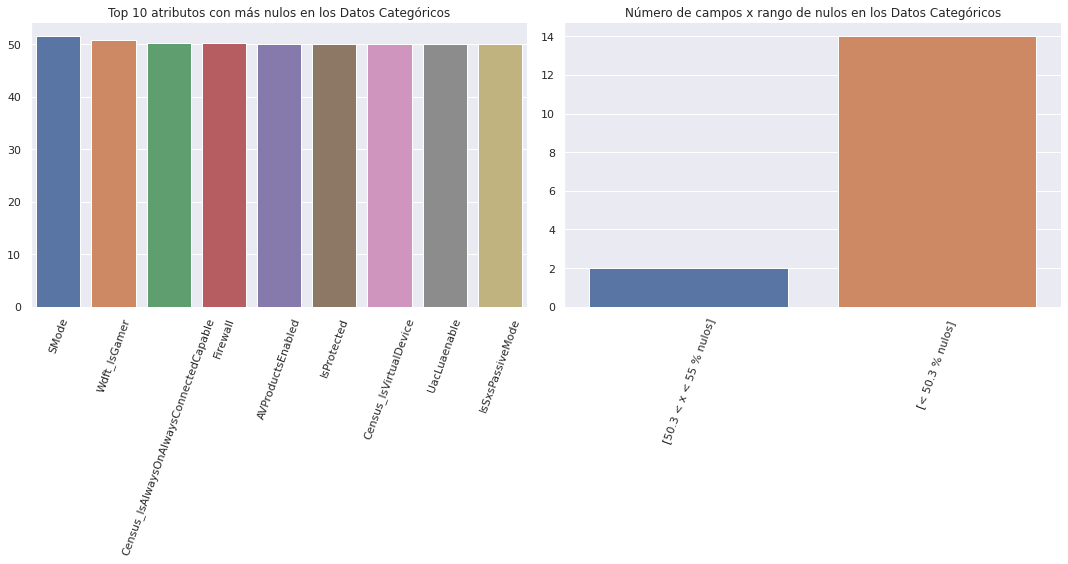

In [ ]:
analisisNulos(data.loc[:, data.columns.isin(boolean_columns)],"Datos Categóricos",0)

### Conclusión análisis nulos
Podemos observar que en la mayoría de las variables el numero de nulos esta por debajo del 50% de los datos. Por otro lado tenemos 4 variables categóricas que no cumplen este patrón. 

Aún así el número de nulos es lo suficientemente significante para tener que tratarlos.

Para ello realizaremos una función que relice el tratamiento de nulos de forma automática.



In [ ]:
def function_to_convert_nulls(input_data,boolan_columns_array):
  for column in input_data.columns:
    dtype_col = input_data.dtypes[column]
    ### primero procesamos los nulos booleanos
    if((dtype_col=="O") & (column in boolean_columns)):
        display(pd.isnull(input_data[column]))
    elif(column in input_data.select_dtypes(include=['number'])):
      display("numeric",column)
    else:
      display("categoric",column)



function_to_convert_nulls(data,boolean_columns)




'categoric'

'MachineIdentifier'

'categoric'

'ProductName'

'categoric'

'EngineVersion'

'categoric'

'AppVersion'

'categoric'

'AvSigVersion'

'numeric'

'RtpStateBitfield'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'DefaultBrowsersIdentifier'

'categoric'

'AVProductStatesIdentifier'

'numeric'

'AVProductsInstalled'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'CountryIdentifier'

'categoric'

'CityIdentifier'

'categoric'

'OrganizationIdentifier'

'categoric'

'GeoNameIdentifier'

'categoric'

'LocaleEnglishNameIdentifier'

'categoric'

'Platform'

'categoric'

'Processor'

'categoric'

'OsVer'

'categoric'

'OsBuild'

'categoric'

'OsSuite'

'categoric'

'OsPlatformSubRelease'

'categoric'

'OsBuildLab'

'categoric'

'SkuEdition'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'PuaMode'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570     True
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746     True
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536      True
4382974    False
2574452    Fal

'categoric'

'IeVerIdentifier'

'categoric'

'SmartScreen'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'Census_MDC2FormFactor'

'categoric'

'Census_DeviceFamily'

'categoric'

'Census_OEMNameIdentifier'

'categoric'

'Census_OEMModelIdentifier'

'numeric'

'Census_ProcessorCoreCount'

'categoric'

'Census_ProcessorManufacturerIdentifier'

'categoric'

'Census_ProcessorModelIdentifier'

'categoric'

'Census_ProcessorClass'

'numeric'

'Census_PrimaryDiskTotalCapacity'

'categoric'

'Census_PrimaryDiskTypeName'

'numeric'

'Census_SystemVolumeTotalCapacity'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'numeric'

'Census_TotalPhysicalRAM'

'categoric'

'Census_ChassisTypeName'

'numeric'

'Census_InternalPrimaryDiagonalDisplaySizeInInches'

'numeric'

'Census_InternalPrimaryDisplayResolutionHorizontal'

'numeric'

'Census_InternalPrimaryDisplayResolutionVertical'

'categoric'

'Census_PowerPlatformRoleName'

'categoric'

'Census_InternalBatteryType'

'numeric'

'Census_InternalBatteryNumberOfCharges'

'categoric'

'Census_OSVersion'

'categoric'

'Census_OSArchitecture'

'categoric'

'Census_OSBranch'

'categoric'

'Census_OSBuildNumber'

'categoric'

'Census_OSBuildRevision'

'categoric'

'Census_OSEdition'

'categoric'

'Census_OSSkuName'

'categoric'

'Census_OSInstallTypeName'

'categoric'

'Census_OSInstallLanguageIdentifier'

'categoric'

'Census_OSUILocaleIdentifier'

'categoric'

'Census_OSWUAutoUpdateOptionsName'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'Census_GenuineStateName'

'categoric'

'Census_ActivationChannel'

'categoric'

'Census_FlightRing'

'categoric'

'Census_FirmwareManufacturerIdentifier'

'categoric'

'Census_FirmwareVersionIdentifier'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179     True
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179     True
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287     True
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061     True
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

'categoric'

'Wdft_RegionIdentifier'

8427007    False
8829090    False
2731904    False
1359513    False
236059     False
3771983    False
4833329    False
985557     False
387390     False
7131823    False
844555     False
5473816    False
2382707    False
4813253    False
6430570    False
3240179    False
5951649    False
8438263    False
8177139    False
2797061    False
2679011    False
5559803    False
7918492    False
2793594    False
6899201    False
305017     False
5660382    False
7661018    False
4062628    False
2074872    False
3399393    False
1183937    False
92353      False
7790419    False
4729074    False
3610977    False
276925     False
6238524    False
3839245    False
8419280    False
6840843    False
2894206    False
7910746    False
5622966    False
6256022    False
622921     False
8588032    False
2741349    False
248308     False
4504830    False
548449     False
2672154    False
7272287    False
8171307    False
1586738    False
7037870    False
507536     False
4382974    False
2574452    Fal

## 2.1.6 Distribuición del target



In [ ]:
#@title
data[TARGET].value_counts()

1.0    2797
0.0    2789
Name: HasDetections, dtype: int64

In [ ]:
data[[TARGET]].head()

HasDetections
8427007           1.0
8829090           0.0
2731904           0.0
1359513           1.0
236059            1.0

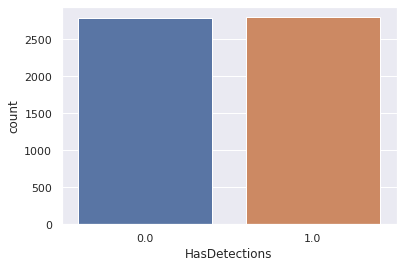

In [ ]:
sns.countplot(data=data, x=TARGET)

In [ ]:
data[TARGET].value_counts(dropna=False)

1.0    2797
0.0    2789
NaN       1
Name: HasDetections, dtype: int64

Observamos que hay un valor NaN. Revisemos la línea que lo contiene.

Por lo demás, el ratio de infección es prácticamente del 50% para este data set.

In [ ]:
data[data[TARGET].isnull()]

MachineIdentifier   ProductName EngineVersion  \
7353236  d2f969e3dd2d7dd63b45bedd23a3e4c8  win8defender   1.1.15100.1   

        AppVersion AvSigVersion  RtpStateBitfield IsSxsPassiveMode  \
7353236  4.18.1807          NaN               NaN              NaN   

        DefaultBrowsersIdentifier AVProductStatesIdentifier  \
7353236                       NaN                       NaN   

         AVProductsInstalled AVProductsEnabled HasTpm CountryIdentifier  \
7353236                  NaN               NaN    NaN               NaN   

        CityIdentifier OrganizationIdentifier GeoNameIdentifier  \
7353236            NaN                    NaN               NaN   

        LocaleEnglishNameIdentifier Platform Processor OsVer OsBuild OsSuite  \
7353236                         NaN      NaN       NaN   NaN     NaN     NaN   

        OsPlatformSubRelease OsBuildLab SkuEdition IsProtected PuaMode SMode  \
7353236                  NaN        NaN        NaN         NaN     NaN   NaN   

        IeVerIdentifier SmartScreen Firewall UacLuaenable  \
7353236             NaN         NaN      NaN          NaN   

        Census_MDC2FormFactor Census_DeviceFamily Census_OEMNameIdentifier  \
7353236                   NaN                 NaN                      NaN   

        Census_OEMModelIdentifier  Census_ProcessorCoreCount  \
7353236                       NaN                        NaN   

        Census_ProcessorManufacturerIdentifier  \
7353236                                    NaN   

        Census_ProcessorModelIdentifier Census_ProcessorClass  \
7353236                             NaN                   NaN   

         Census_PrimaryDiskTotalCapacity Census_PrimaryDiskTypeName  \
7353236                              NaN                        NaN   

         Census_SystemVolumeTotalCapacity Census_HasOpticalDiskDrive  \
7353236                               NaN                        NaN   

         Census_TotalPhysicalRAM Census_ChassisTypeName  \
7353236                      NaN                    NaN   

         Census_InternalPrimaryDiagonalDisplaySizeInInches  \
7353236                                                NaN   

         Census_InternalPrimaryDisplayResolutionHorizontal  \
7353236                                                NaN   

         Census_InternalPrimaryDisplayResolutionVertical  \
7353236                                              NaN   

        Census_PowerPlatformRoleName Census_InternalBatteryType  \
7353236                          NaN                        NaN   

         Census_InternalBatteryNumberOfCharges Census_OSVersion  \
7353236                                    NaN              NaN   

        Census_OSArchitecture Census_OSBranch Census_OSBuildNumber  \
7353236                   NaN             NaN                  NaN   

        Census_OSBuildRevision Census_OSEdition Census_OSSkuName  \
7353236                    NaN              NaN              NaN   

        Census_OSInstallTypeName Census_OSInstallLanguageIdentifier  \
7353236                      NaN                                NaN   

        Census_OSUILocaleIdentifier Census_OSWUAutoUpdateOptionsName  \
7353236                         NaN                              NaN   

        Census_IsPortableOperatingSystem Census_GenuineStateName  \
7353236                              NaN                     NaN   

        Census_ActivationChannel Census_FlightRing  \
7353236                      NaN               NaN   

        Census_FirmwareManufacturerIdentifier  \
7353236                                   NaN   

        Census_FirmwareVersionIdentifier Census_IsSecureBootEnabled  \
7353236                              NaN                        NaN   

        Census_IsVirtualDevice Census_IsTouchEnabled Census_IsPenCapable  \
7353236                    NaN                   NaN                 NaN   

        Census_IsAlwaysOnAlwaysConnectedCapable Wdft_IsGamer  \
7353236                                  

Observamos que, efectivamente, esta línea apenas contiene información válida. Una opción es quitar la línea si no aporta valor.  

In [ ]:
data= data.drop(data[data[TARGET].isnull()].index)

Información genérica del Target:

In [ ]:
data[TARGET].describe()

count     5586.0
unique       2.0
top          1.0
freq      2797.0
Name: HasDetections, dtype: float64

## 2.1.6 - 2.1.8 Distribuición de variables y correlación


### Cambio a categóricas para analizar correctamente la correlación

Para poder analizar las variables correctamente debemos asignarle el tipo correspondiente. 


**En el caso de las booleanas las tratamos como object para conservar los nulos que se perdían al transformarlos a booleanos** .

Esto lo hemos ido haciendo con anterioridad para mejorar la lectura y entendimiento de la transformación para cada variable.



In [ ]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586 entries, 8427007 to 390985
Columns: 77 entries, MachineIdentifier to HasDetections
dtypes: float64(10), object(67)
memory usage: 3.3+ MB


Observamos que solo tenemos variables de tipo float (10 atributos numéricos) y 67 "categóricos" , entre los que se encuentran las variables booleanas también.

### 2.2.1. Distribuición del target en relación a variables numéricas

Debido al gran número de variables usaremos una función por cada tipología, al menos una presentación inicial que nos sirva para identificar el grado de correlación.

En este caso no disponemos de ninguna fecha por lo que omitiremos dichas funciones.

En el caso de los numéricos aplicaremos distintas funciones de representación en función al volumen de valores distintos que tengamos.

 Lo más importante:

 


*   **Si el volumen de valores únicos es menor de 20, lo analizaremos de forma discreta**
*   **Los nulos los rellenamos con valores fuera de rango**





In [ ]:
def numericWisdom(data,target):
  numericColumns = data.describe(include = np.number).T.index 
  for numericColumn in numericColumns:
    print("\n\n#######################\n#\n#\t " + numericColumn + "\n#\n#########\n")
    print("\n")
    
    ### first fill nulls outside range 
    
    ## we calculate a similar distance for all and fill the nulls 
    offset = data[numericColumn].describe()["mean"] - data[numericColumn].describe()["min"] 
    offset = data[numericColumn].describe()["min"] - offset
    data[numericColumn] = data[numericColumn].fillna(offset)


    if data[numericColumn].value_counts().size<=20 :
      plt.figure()
      
      # Creating crosstab
      crosstb = pd.crosstab(data[numericColumn], data[target])
      
      

      print("\n")

      # Draw a heatmap with the numeric values in each cell
      f, ax = plt.subplots(1,1,figsize=(5, 3))
      sns.heatmap(crosstb, annot=True, linewidths=.5,cmap="YlGnBu", ax=ax)
      plt.show()

    else:
      
      display(pd.DataFrame(data[numericColumn].describe()))
      plt.figure()
      
      print("\n")

      # Set up the matplotlib figure
      f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
      # Generate some sequential data

      sns.histplot(data=data, x = numericColumn,ax=ax1)
      sns.boxplot(data = data, x = target, y =numericColumn, ax=ax2)
      ax1.set_title('Histograma para ' +numericColumn)
      ax2.set_title('Boxplot entre ' + numericColumn + " y " + target )

      
      plt.show()



#######################
#
#	 RtpStateBitfield
#
#########







<Figure size 432x288 with 0 Axes>

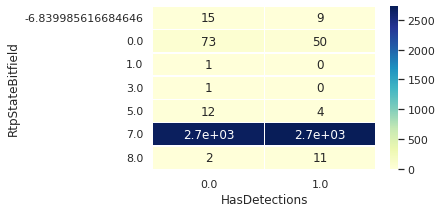



#######################
#
#	 AVProductsInstalled
#
#########







<Figure size 432x288 with 0 Axes>

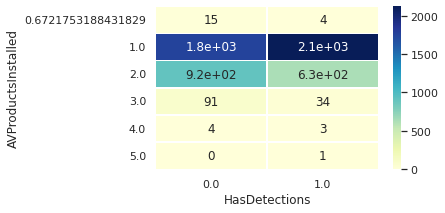



#######################
#
#	 Census_ProcessorCoreCount
#
#########







<Figure size 432x288 with 0 Axes>

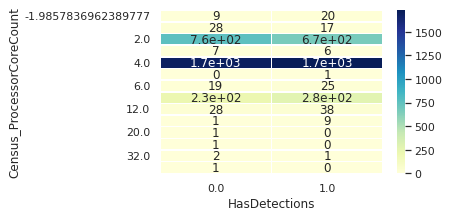



#######################
#
#	 Census_PrimaryDiskTotalCapacity
#
#########





Census_PrimaryDiskTotalCapacity
count                     5.586000e+03
mean                      5.127549e+05
std                       3.738122e+05
min                      -4.990213e+05
25%                       2.384750e+05
50%                       4.769400e+05
75%                       9.538690e+05
max                       4.769307e+06

<Figure size 432x288 with 0 Axes>

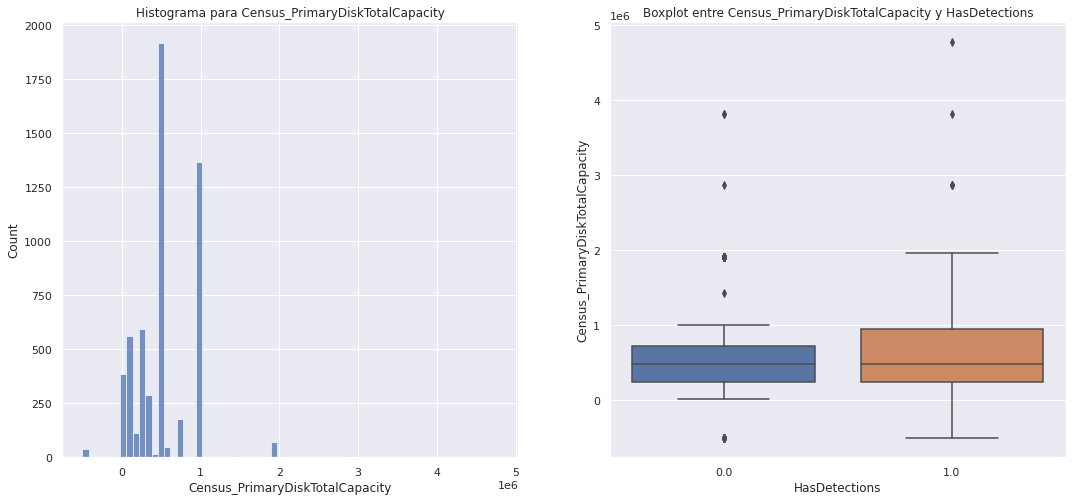



#######################
#
#	 Census_SystemVolumeTotalCapacity
#
#########





Census_SystemVolumeTotalCapacity
count                      5.586000e+03
mean                       3.798284e+05
std                        3.354481e+05
min                       -3.654196e+05
25%                        1.208270e+05
50%                        2.611135e+05
75%                        4.761380e+05
max                        3.814830e+06

<Figure size 432x288 with 0 Axes>

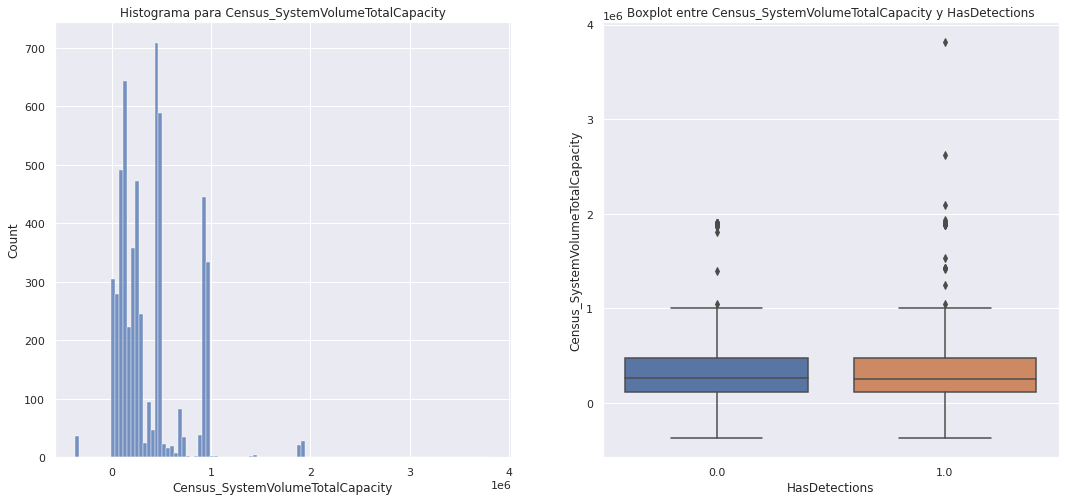



#######################
#
#	 Census_TotalPhysicalRAM
#
#########





Census_TotalPhysicalRAM
count              5586.000000
mean               6022.721310
std                4992.139617
min               -4084.462722
25%                4096.000000
50%                4096.000000
75%                8192.000000
max              131072.000000

<Figure size 432x288 with 0 Axes>

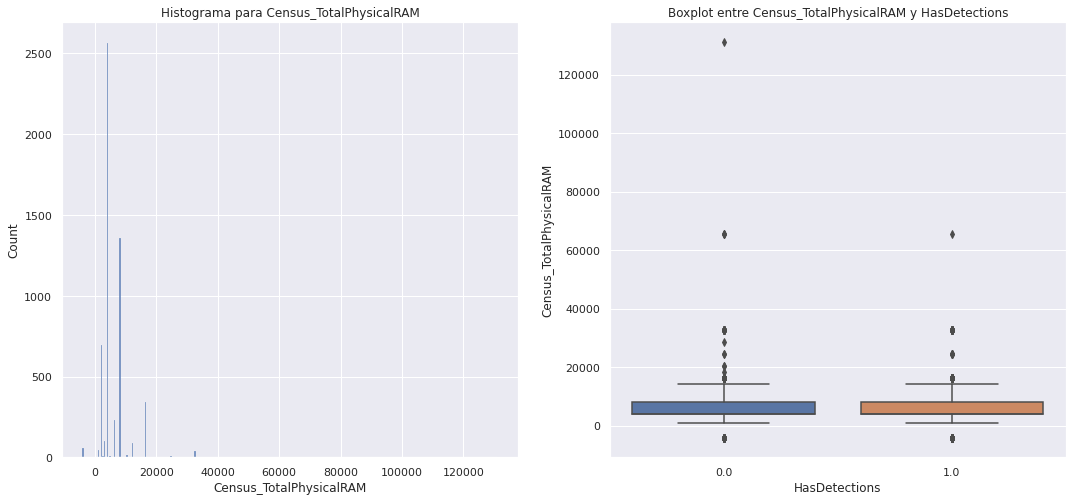



#######################
#
#	 Census_InternalPrimaryDiagonalDisplaySizeInInches
#
#########





Census_InternalPrimaryDiagonalDisplaySizeInInches
count                                        5586.000000
mean                                           16.664902
std                                             6.164372
min                                            -2.945982
25%                                            13.900000
50%                                            15.500000
75%                                            17.300000
max                                            74.900000

<Figure size 432x288 with 0 Axes>

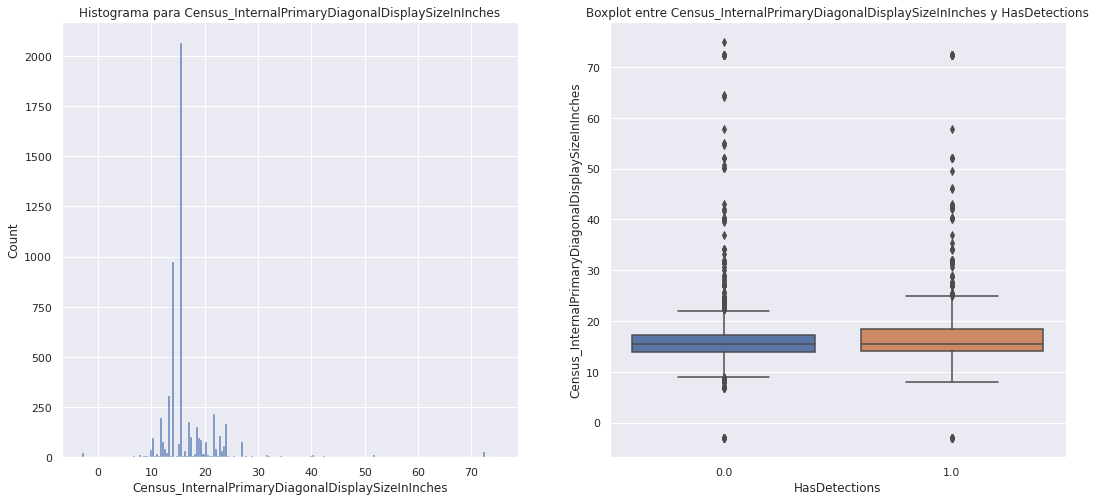



#######################
#
#	 Census_InternalPrimaryDisplayResolutionHorizontal
#
#########





Census_InternalPrimaryDisplayResolutionHorizontal
count                                        5586.000000
mean                                         1539.958904
std                                           378.126231
min                                          -347.763617
25%                                          1366.000000
50%                                          1366.000000
75%                                          1920.000000
max                                          3840.000000

<Figure size 432x288 with 0 Axes>

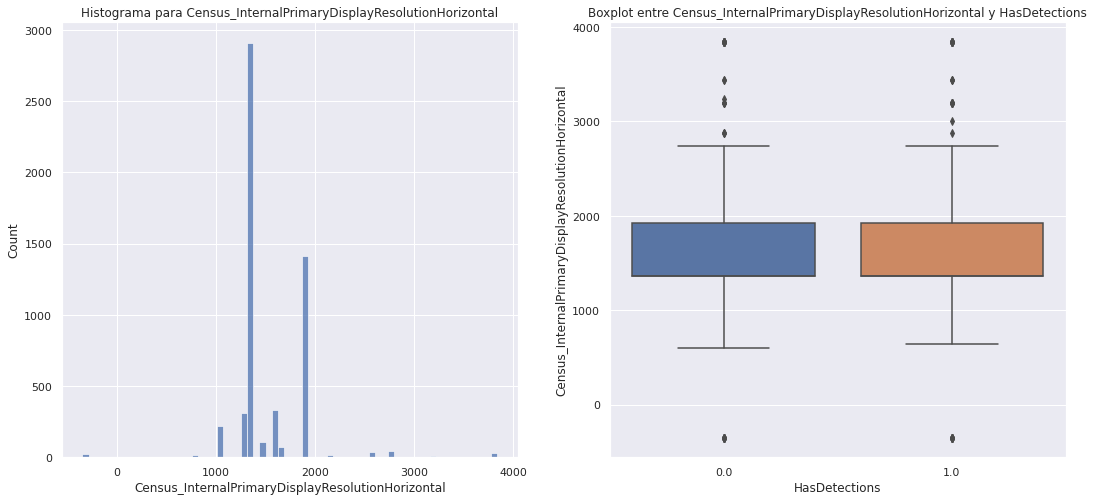



#######################
#
#	 Census_InternalPrimaryDisplayResolutionVertical
#
#########





Census_InternalPrimaryDisplayResolutionVertical
count                                      5586.000000
mean                                        893.263341
std                                         215.082582
min                                          63.305231
25%                                         768.000000
50%                                         768.000000
75%                                        1080.000000
max                                        2160.000000

<Figure size 432x288 with 0 Axes>

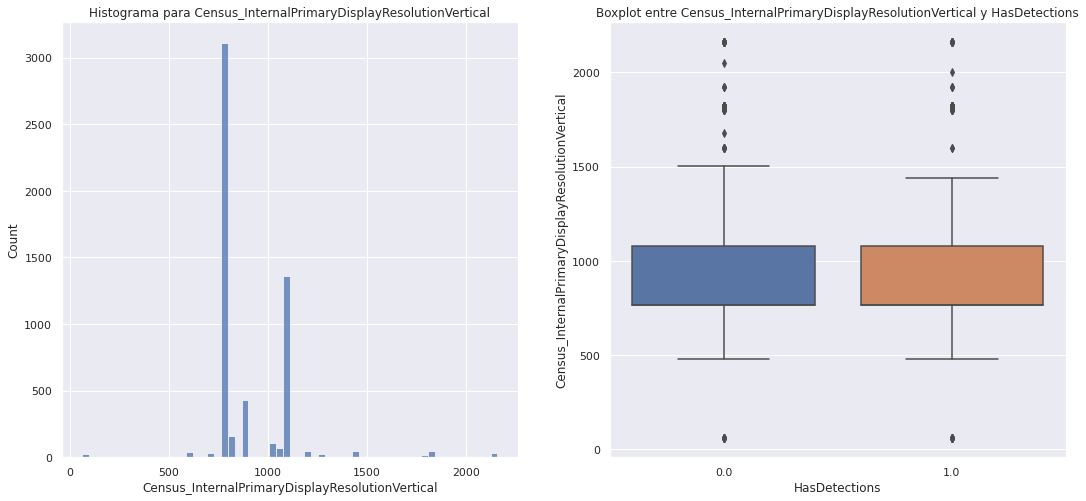



#######################
#
#	 Census_InternalBatteryNumberOfCharges
#
#########





Census_InternalBatteryNumberOfCharges
count                           5.586000e+03
mean                            1.091269e+09
std                             1.920549e+09
min                            -1.161552e+09
25%                             0.000000e+00
50%                             0.000000e+00
75%                             4.294967e+09
max                             4.294967e+09

<Figure size 432x288 with 0 Axes>

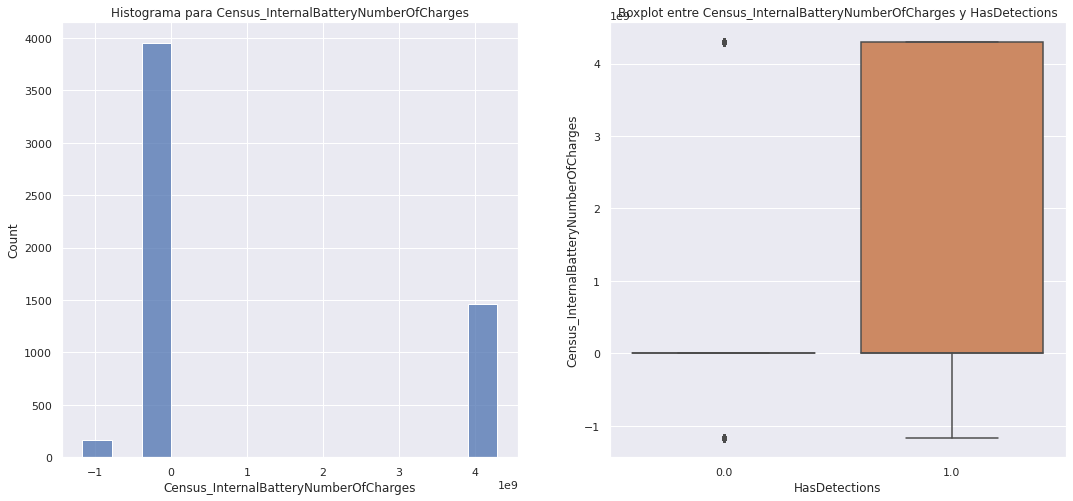

In [ ]:
numericWisdom(data,TARGET)

#### Conclusión variables numéricas.

No se observa ninguna correlación representativa con el target . 

### 2.2.2. Distribuición del target en relación a variables categóricas

Aplicamos la misma lógica a la variables categóricas
*   **Rellenamos nulos con valor ZZZ**
*   **Consideramos que si tiene un valor de 20 tendrá una interpretación continúa y numérica**





#######################
#
#	 MachineIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



MachineIdentifier
8427007  f1cd864e97bae82bdf96523e1a539121
8829090  fd5ba6f5b75325ec0423a6c67cc75942
2731904  4e628391e7cc7c482fb3286f486dbd25
1359513  270a2e9d028144a4df12a9e3da79fba5
236059   06ca8fa8d32c2abdc5b3577d676b3269
3771983  6c3ff3036d3ecc96729a615653742608
4833329  8ab73b7f8dbb0d0d57f54a8b4799e960
985557   1c4ec21828b563afb6b0aa72ef88926d
387390   0b247aa88737776d0f88ce4dee447216
7131823  cc9e1141a127a305cddc17baaa36bcb3



#######################
#
#	 ProductName
#
#########





ProductName
win8defender         5534
mse                    52

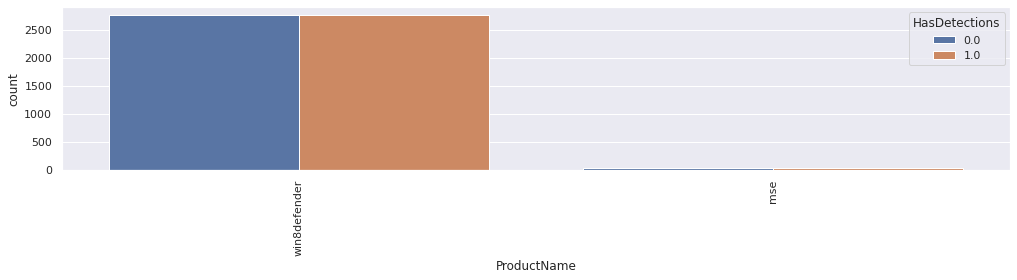

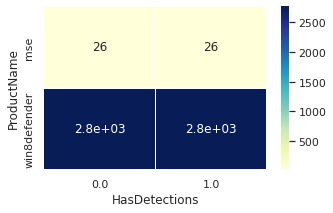



#######################
#
#	 EngineVersion
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



EngineVersion
8427007   1.1.15100.1
8829090   1.1.15100.1
2731904   1.1.15100.1
1359513   1.1.15200.1
236059    1.1.15200.1
3771983   1.1.15200.1
4833329   1.1.15200.1
985557    1.1.15100.1
387390    1.1.15100.1
7131823   1.1.15200.1



#######################
#
#	 AppVersion
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



AppVersion
8427007  4.18.1807.18075
8829090  4.18.1807.18075
2731904   4.9.10586.1106
1359513  4.18.1807.18075
236059   4.18.1807.18075
3771983  4.18.1807.18075
4833329  4.18.1807.18075
985557   4.18.1806.18062
387390   4.18.1807.18075
7131823  4.18.1807.18075



#######################
#
#	 AvSigVersion
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



AvSigVersion
8427007  1.273.1234.0
8829090  1.273.1282.0
2731904   1.273.781.0
1359513  1.275.1639.0
236059    1.275.511.0
3771983   1.275.981.0
4833329   1.275.497.0
985557    1.273.293.0
387390    1.273.418.0
7131823   1.275.511.0



#######################
#
#	 DefaultBrowsersIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



DefaultBrowsersIdentifier
8427007                       zzz
8829090                       zzz
2731904                       zzz
1359513                       zzz
236059                        zzz
3771983                       zzz
4833329                       zzz
985557                        zzz
387390                        zzz
7131823                       zzz



#######################
#
#	 AVProductStatesIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



AVProductStatesIdentifier
8427007                   53447.0
8829090                   53447.0
2731904                   46781.0
1359513                   53447.0
236059                    47238.0
3771983                    7945.0
4833329                   53447.0
985557                    40645.0
387390                    46067.0
7131823                   53447.0



#######################
#
#	 CountryIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



CountryIdentifier
8427007                8.0
8829090              129.0
2731904              149.0
1359513              164.0
236059               207.0
3771983               91.0
4833329              149.0
985557                43.0
387390                80.0
7131823              154.0



#######################
#
#	 CityIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



CityIdentifier
8427007        85219.0
8829090        54198.0
2731904       122689.0
1359513       114587.0
236059         72421.0
3771983       110905.0
4833329       162018.0
985557         50414.0
387390          7182.0
7131823       108573.0



#######################
#
#	 OrganizationIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



OrganizationIdentifier
8427007                    zzz
8829090                    zzz
2731904                   27.0
1359513                   27.0
236059                    27.0
3771983                    zzz
4833329                   27.0
985557                    18.0
387390                    27.0
7131823                   27.0



#######################
#
#	 GeoNameIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



GeoNameIdentifier
8427007              205.0
8829090              126.0
2731904              181.0
1359513              205.0
236059               277.0
3771983              125.0
4833329              181.0
985557                53.0
387390               101.0
7131823              198.0



#######################
#
#	 LocaleEnglishNameIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



LocaleEnglishNameIdentifier
8427007                        172.0
8829090                        124.0
2731904                         56.0
1359513                        172.0
236059                          75.0
3771983                         75.0
4833329                         56.0
985557                          42.0
387390                         107.0
7131823                        229.0



#######################
#
#	 Platform
#
#########





Platform
windows10        5421
windows8          102
windows7           51
windows2016        12

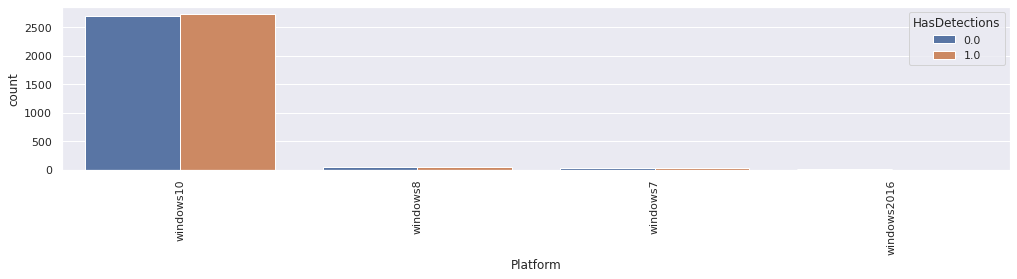

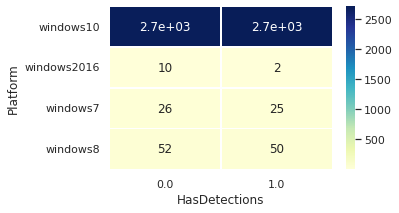



#######################
#
#	 Processor
#
#########





Processor
x64       5087
x86        499

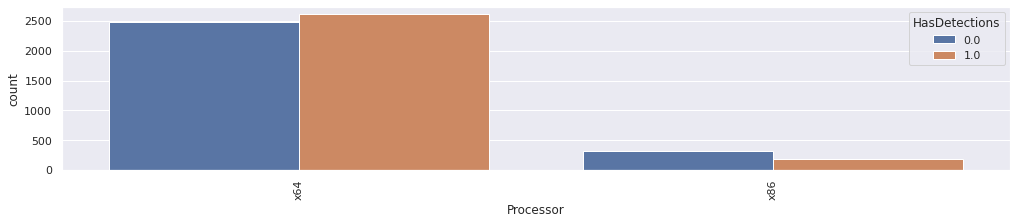

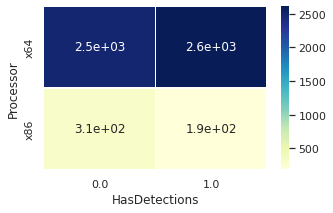



#######################
#
#	 OsVer
#
#########





OsVer
10.0.0.0   5433
6.3.0.0     102
6.1.1.0      50
6.1.0.0       1

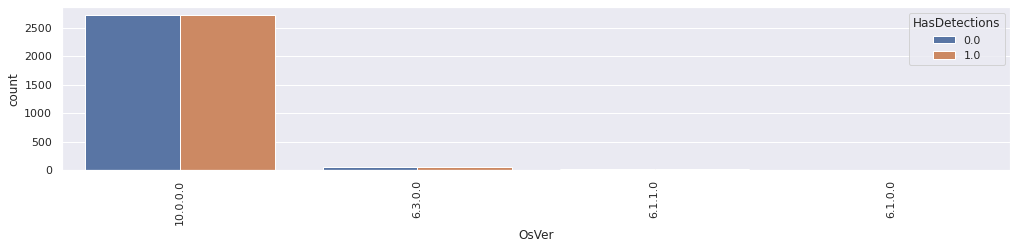

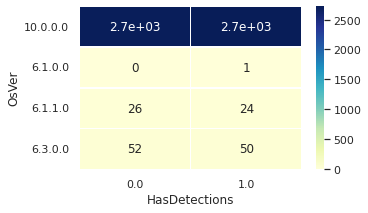



#######################
#
#	 OsBuild
#
#########





OsBuild
17134.0     2575
16299.0     1543
15063.0      465
14393.0      445
10586.0      226
10240.0      170
9600.0       102
7601.0        50
17692.0        3
17746.0        2
17738.0        1
17758.0        1
7600.0         1
17713.0        1
17760.0        1

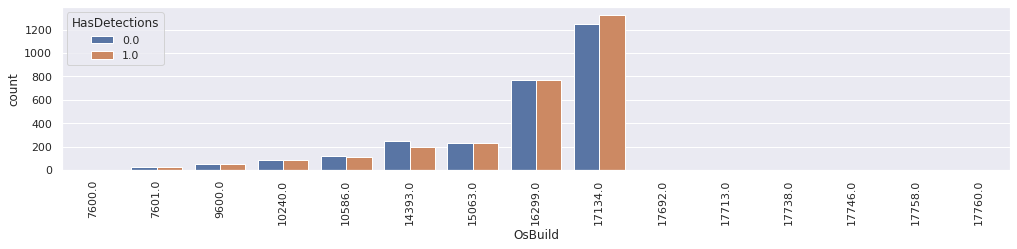

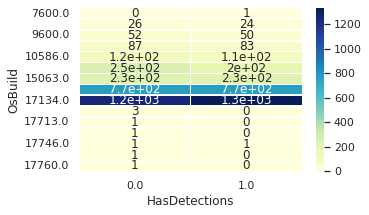



#######################
#
#	 OsSuite
#
#########





OsSuite
768.0     3462
256.0     2111
272.0        9
305.0        2
400.0        1
784.0        1

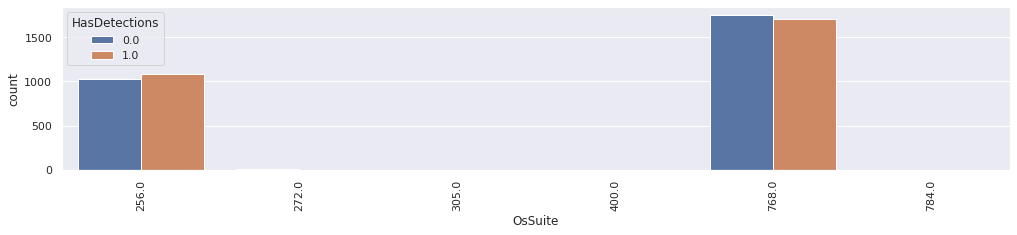

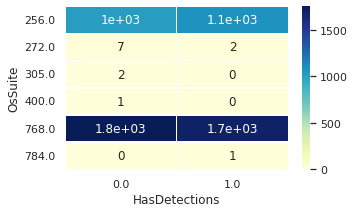



#######################
#
#	 OsPlatformSubRelease
#
#########





OsPlatformSubRelease
rs4                         2575
rs3                         1543
rs2                          465
rs1                          445
th2                          226
th1                          170
windows8.1                   102
windows7                      51
prers5                         9

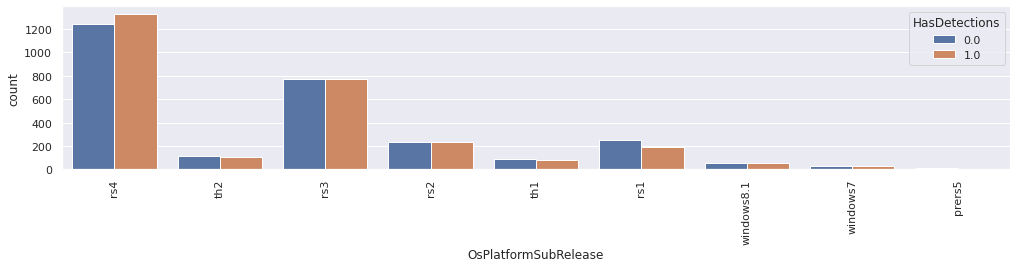

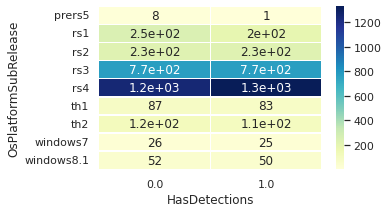



#######################
#
#	 OsBuildLab
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



OsBuildLab
8427007               17134.1.amd64fre.rs4_release.180410-1804
8829090               17134.1.amd64fre.rs4_release.180410-1804
2731904        10586.1176.amd64fre.th2_release_sec.170913-1848
1359513               17134.1.amd64fre.rs4_release.180410-1804
236059                17134.1.amd64fre.rs4_release.180410-1804
3771983  16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
4833329                 15063.0.x86fre.rs2_release.170317-1834
985557                15063.0.amd64fre.rs2_release.170317-1834
387390                17134.1.amd64fre.rs4_release.180410-1804
7131823                 17134.1.x86fre.rs4_release.180410-1804



#######################
#
#	 SkuEdition
#
#########





SkuEdition
Home                   3436
Pro                    2031
Invalid                  46
Education                35
Enterprise               17
Enterprise LTSB          16
Cloud                     3
Server                    2

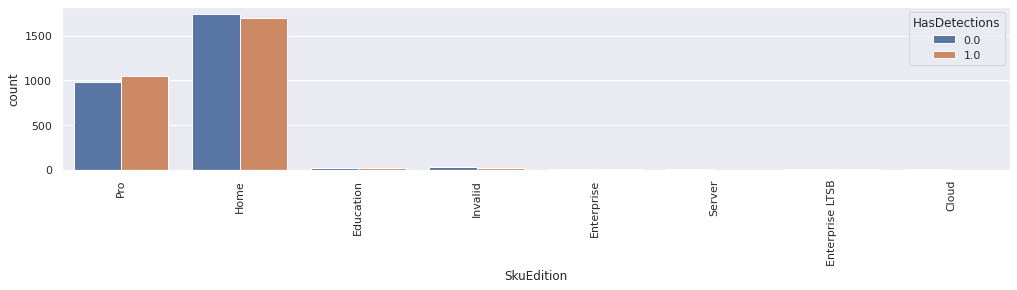

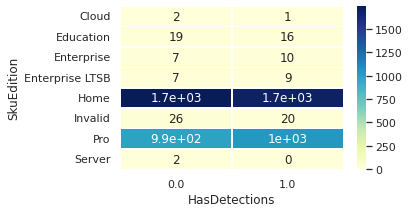



#######################
#
#	 PuaMode
#
#########





PuaMode
zzz     5585
on         1

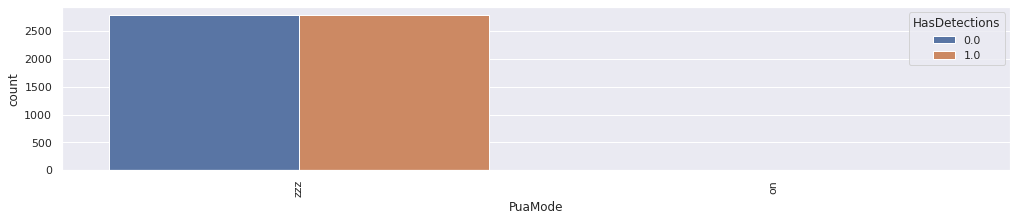

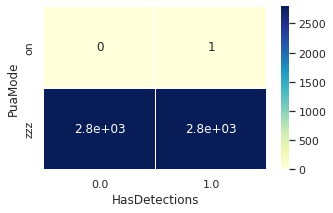



#######################
#
#	 IeVerIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



IeVerIdentifier
8427007           137.0
8829090           137.0
2731904            74.0
1359513           137.0
236059            137.0
3771983           117.0
4833329           108.0
985557            108.0
387390            137.0
7131823           137.0



#######################
#
#	 SmartScreen
#
#########





SmartScreen
RequireAdmin         2740
zzz                  1993
ExistsNotSet          602
Off                   117
Warn                   94
Prompt                 22
Block                  15
off                     2
On                      1

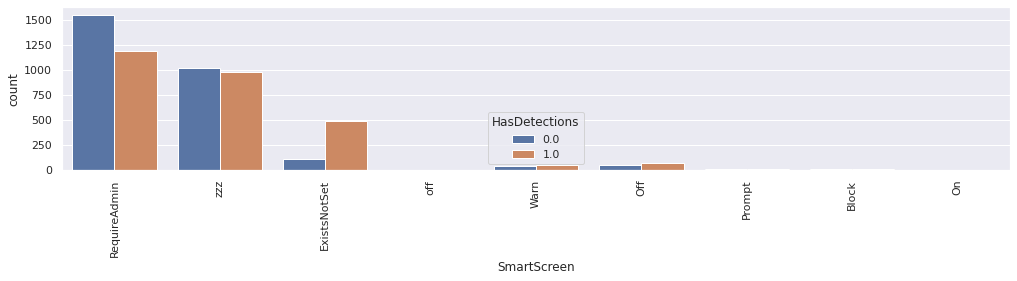

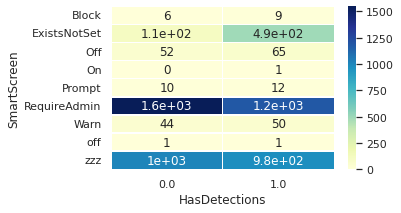



#######################
#
#	 Census_MDC2FormFactor
#
#########





Census_MDC2FormFactor
Notebook                       3584
Desktop                        1231
Convertible                     244
AllInOne                        193
Detachable                      181
PCOther                          95
LargeTablet                      34
SmallTablet                      16
SmallServer                       7
MediumServer                      1

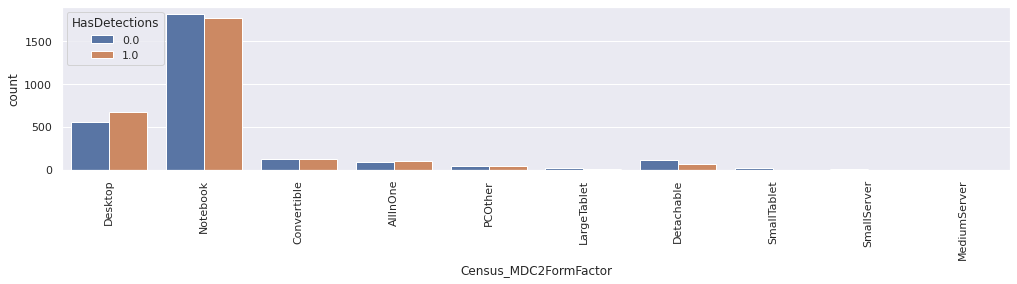

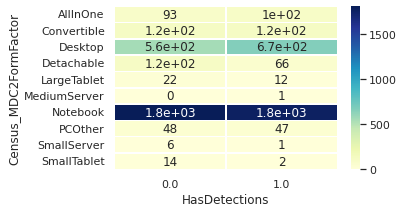



#######################
#
#	 Census_DeviceFamily
#
#########





Census_DeviceFamily
Windows.Desktop                 5574
Windows.Server                    12

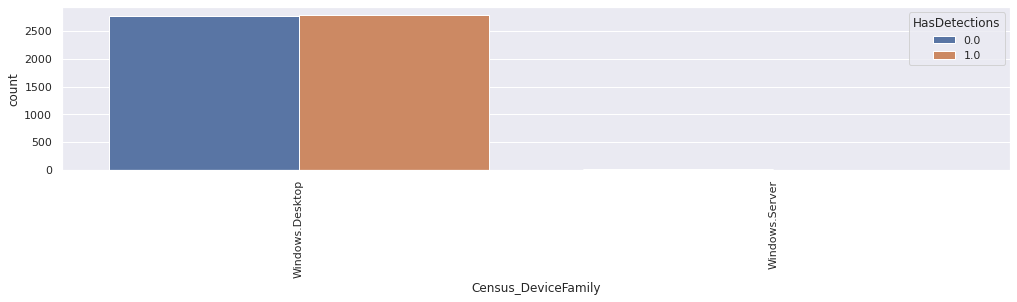

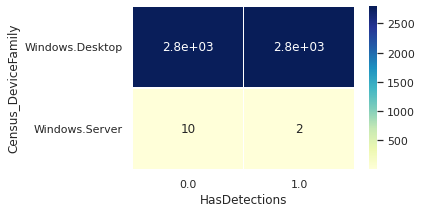



#######################
#
#	 Census_OEMNameIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OEMNameIdentifier
8427007                   1443.0
8829090                   2102.0
2731904                   2206.0
1359513                    525.0
236059                    1443.0
3771983                   1443.0
4833329                   2668.0
985557                     666.0
387390                    1443.0
7131823                    585.0



#######################
#
#	 Census_OEMModelIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OEMModelIdentifier
8427007                  275891.0
8829090                  248850.0
2731904                  238234.0
1359513                  265410.0
236059                   256478.0
3771983                  256581.0
4833329                  119888.0
985557                   264538.0
387390                   256588.0
7131823                  188795.0



#######################
#
#	 Census_ProcessorManufacturerIdentifier
#
#########





Census_ProcessorManufacturerIdentifier
5.0                                    4917
1.0                                     640
zzz                                      29

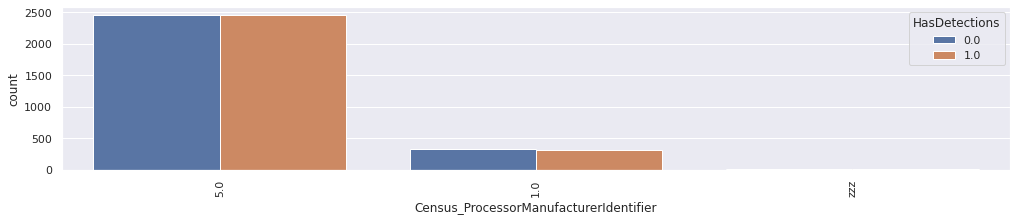

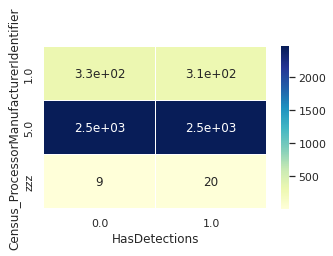



#######################
#
#	 Census_ProcessorModelIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_ProcessorModelIdentifier
8427007                          2273.0
8829090                          2660.0
2731904                          2998.0
1359513                          2880.0
236059                            198.0
3771983                          2302.0
4833329                          4337.0
985557                           2733.0
387390                           2373.0
7131823                          2289.0



#######################
#
#	 Census_ProcessorClass
#
#########





Census_ProcessorClass
zzz                    5571
high                      6
mid                       5
low                       4

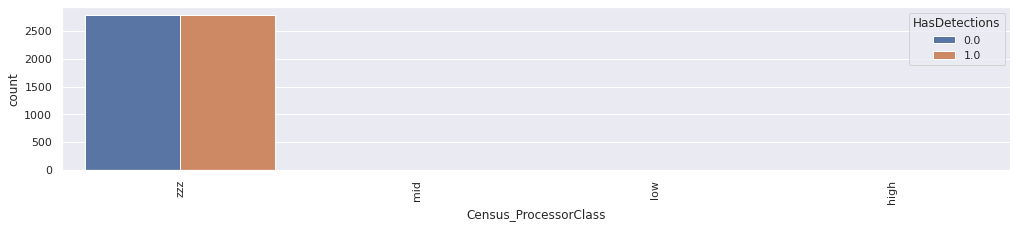

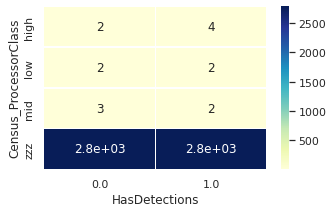



#######################
#
#	 Census_PrimaryDiskTypeName
#
#########





Census_PrimaryDiskTypeName
HDD                                3663
SSD                                1508
UNKNOWN                             234
Unspecified                         172
zzz                                   9

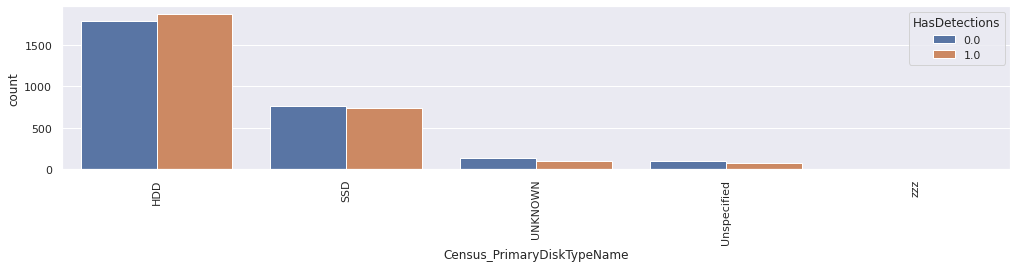

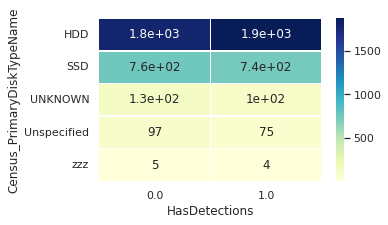



#######################
#
#	 Census_ChassisTypeName
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_ChassisTypeName
8427007               AllinOne
8829090               Notebook
2731904               Notebook
1359513               Notebook
236059                Portable
3771983               Portable
4833329               Notebook
985557                  Laptop
387390                  Laptop
7131823               Notebook



#######################
#
#	 Census_PowerPlatformRoleName
#
#########





Census_PowerPlatformRoleName
Mobile                                    3863
Desktop                                   1313
Slate                                      291
Workstation                                 75
SOHOServer                                  20
UNKNOWN                                     19
EnterpriseServer                             4
AppliancePC                                  1

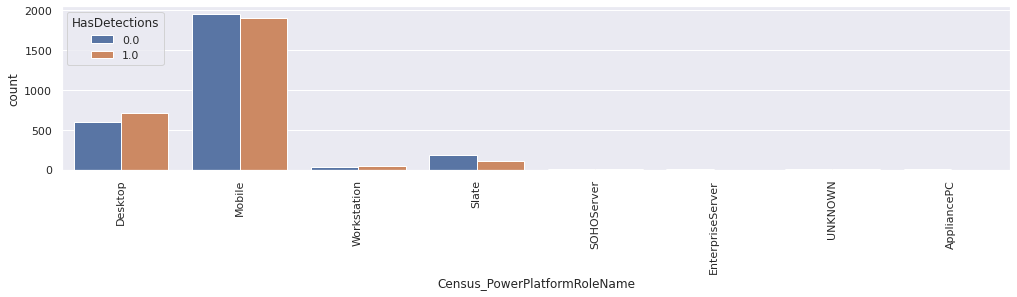

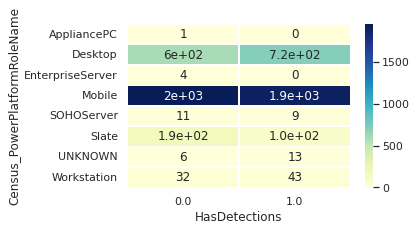



#######################
#
#	 Census_InternalBatteryType
#
#########





Census_InternalBatteryType
zzz                         3985
lion                        1259
li-i                         156
#                            123
lip                           30
liio                          14
li                             4
real                           4
li p                           3
nimh                           3
pbac                           1
lhp0                           1
lgi0                           1
vbox                           1
bq20                           1

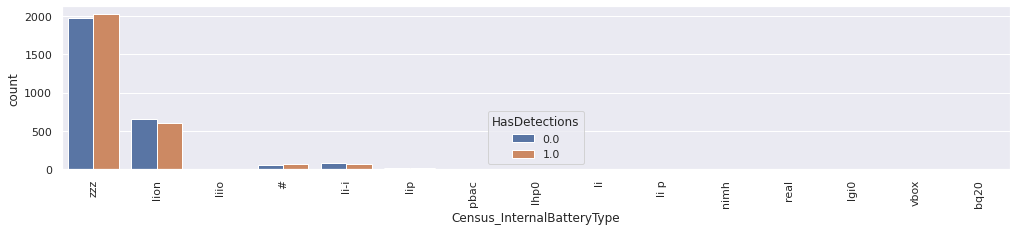

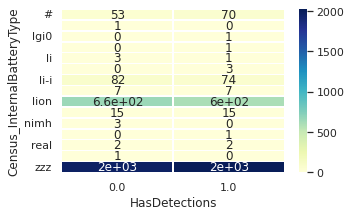



#######################
#
#	 Census_OSVersion
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OSVersion
8427007   10.0.17134.165
8829090   10.0.17134.165
2731904  10.0.10586.1176
1359513   10.0.17134.286
236059    10.0.17134.228
3771983   10.0.16299.611
4833329  10.0.15063.1266
985557   10.0.15063.1088
387390    10.0.17134.165
7131823   10.0.17134.228



#######################
#
#	 Census_OSArchitecture
#
#########





Census_OSArchitecture
amd64                   5087
x86                      499

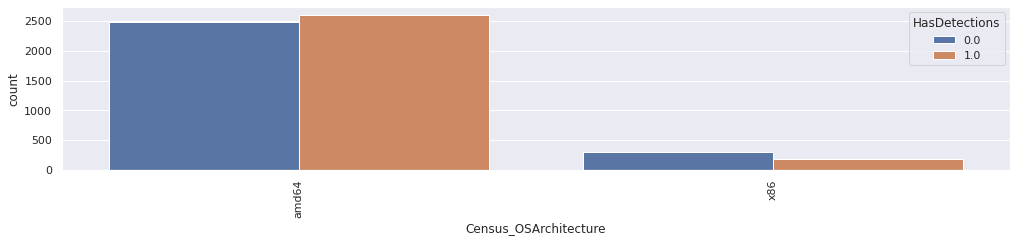

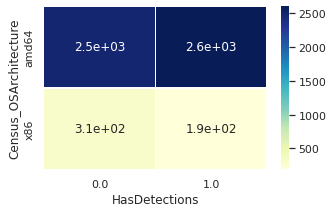



#######################
#
#	 Census_OSBranch
#
#########





Census_OSBranch
rs4_release                           2652
rs3_release_svc_escrow                 776
rs3_release                            719
rs1_release                            474
rs2_release                            463
th2_release                            189
th2_release_sec                        131
th1_st1                                110
th1                                     60
rs5_release                              6
rs_prerelease_flt                        3
rs3_release_svc_escrow_im                3

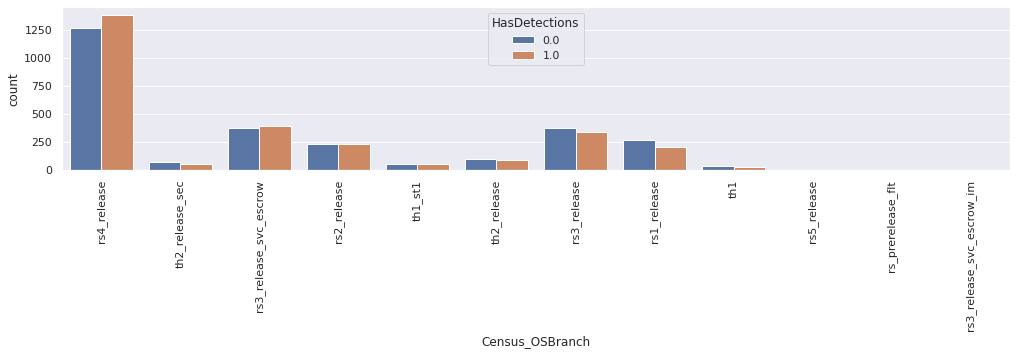

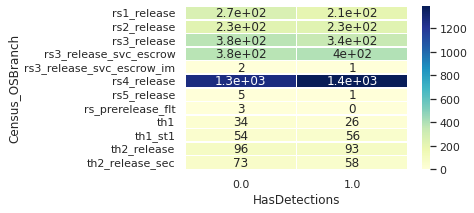



#######################
#
#	 Census_OSBuildNumber
#
#########





Census_OSBuildNumber
17134.0                  2652
16299.0                  1498
14393.0                   474
15063.0                   463
10586.0                   320
10240.0                   170
17692.0                     3
17738.0                     2
17746.0                     2
17758.0                     1
17763.0                     1

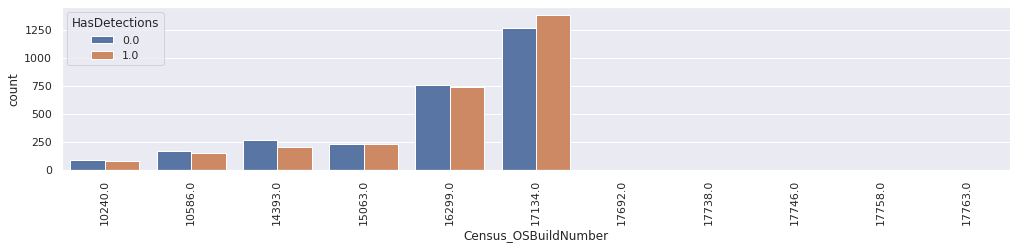

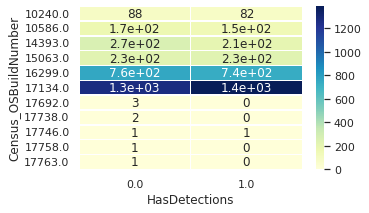



#######################
#
#	 Census_OSBuildRevision
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OSBuildRevision
8427007                   165.0
8829090                   165.0
2731904                  1176.0
1359513                   286.0
236059                    228.0
3771983                   611.0
4833329                  1266.0
985557                   1088.0
387390                    165.0
7131823                   228.0



#######################
#
#	 Census_OSEdition
#
#########





Census_OSEdition
Core                               2106
Professional                       1961
CoreSingleLanguage                 1283
CoreCountrySpecific                  88
ProfessionalEducation                39
Education                            36
ProfessionalN                        21
Enterprise                           17
EnterpriseS                          15
ServerStandard                        8
Cloud                                 3
CoreN                                 3
ServerSolution                        2
ServerStandardEval                    1
ServerDatacenterEval                  1
EnterpriseN                           1
EnterpriseSN                          1

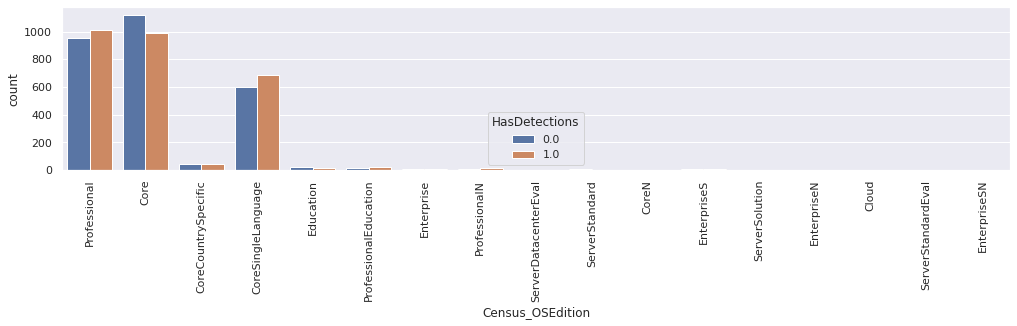

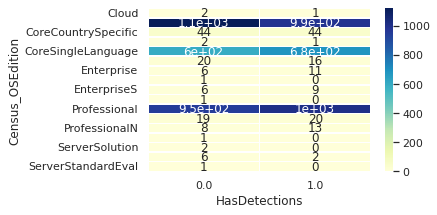



#######################
#
#	 Census_OSSkuName
#
#########





Census_OSSkuName
CORE                                      2107
PROFESSIONAL                              2000
CORE_SINGLELANGUAGE                       1283
CORE_COUNTRYSPECIFIC                        87
EDUCATION                                   36
PROFESSIONAL_N                              21
ENTERPRISE                                  17
ENTERPRISE_S                                15
STANDARD_SERVER                              8
CORE_N                                       3
CLOUD                                        3
SB_SOLUTION_SERVER                           2
DATACENTER_EVALUATION_SERVER                 1
ENTERPRISE_N                                 1
STANDARD_EVALUATION_SERVER                   1
ENTERPRISE_S_N                               1

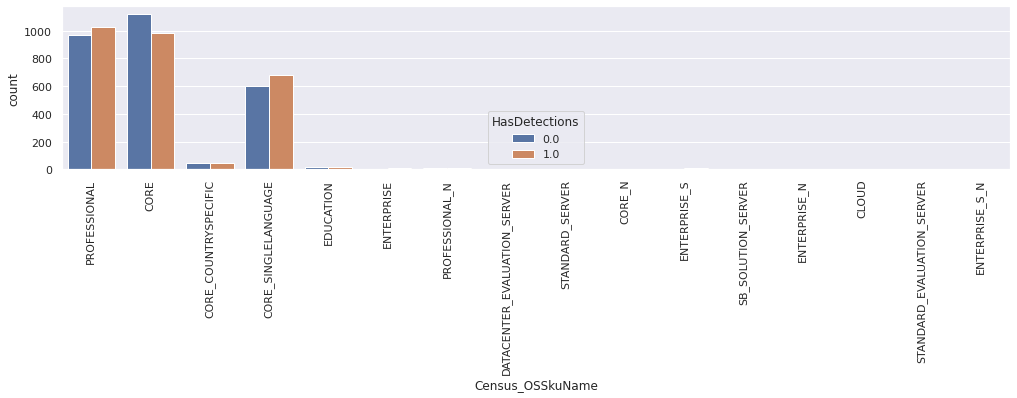

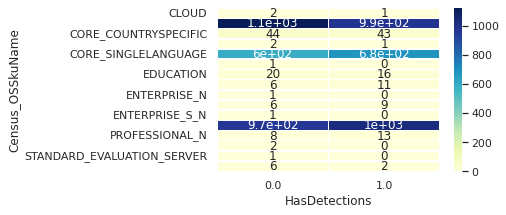



#######################
#
#	 Census_OSInstallTypeName
#
#########





Census_OSInstallTypeName
UUPUpgrade                          1726
IBSClean                            1013
Update                               930
Upgrade                              799
Other                                523
Reset                                391
Refresh                              135
Clean                                 35
CleanPCRefresh                        34

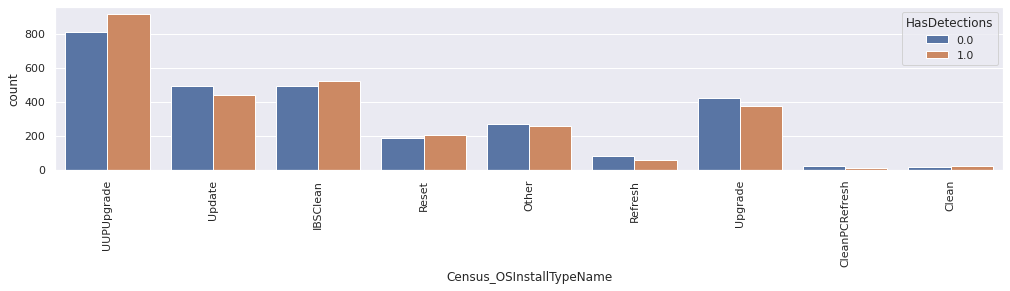

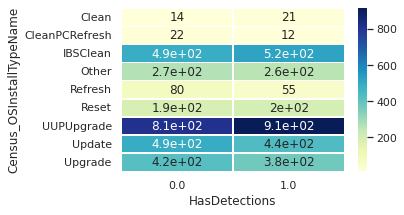



#######################
#
#	 Census_OSInstallLanguageIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OSInstallLanguageIdentifier
8427007                               27.0
8829090                               18.0
2731904                               24.0
1359513                               27.0
236059                                 8.0
3771983                               15.0
4833329                               24.0
985557                                37.0
387390                                 6.0
7131823                                9.0



#######################
#
#	 Census_OSUILocaleIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_OSUILocaleIdentifier
8427007                        120.0
8829090                         72.0
2731904                        109.0
1359513                        120.0
236059                          31.0
3771983                         58.0
4833329                        109.0
985557                         158.0
387390                          28.0
7131823                         34.0



#######################
#
#	 Census_OSWUAutoUpdateOptionsName
#
#########





Census_OSWUAutoUpdateOptionsName
FullAuto                                                           2625
UNKNOWN                                                            1501
Notify                                                             1204
AutoInstallAndRebootAtMaintenanceTime                               231
Off                                                                  13
DownloadNotify                                                       12

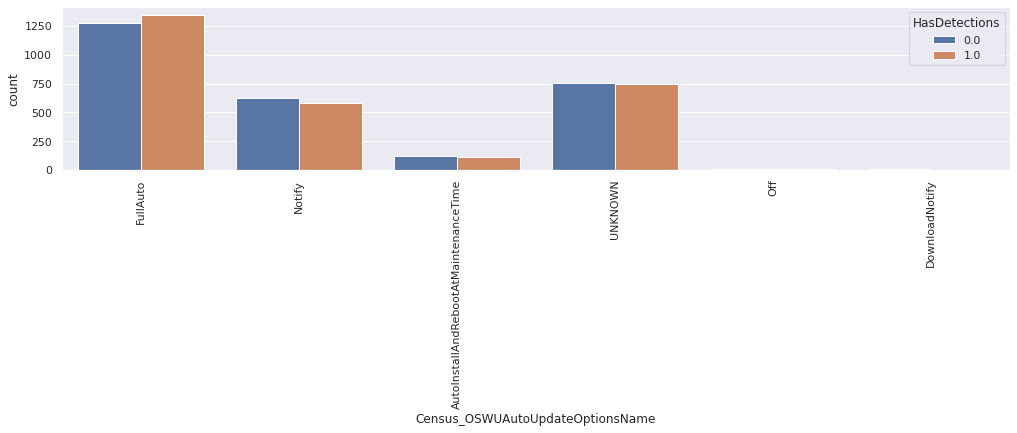

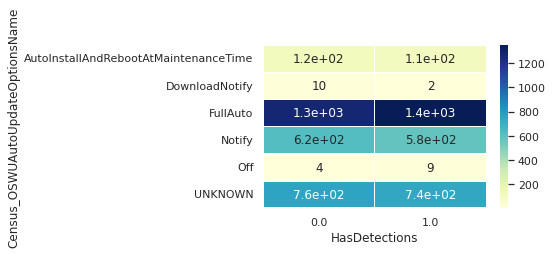



#######################
#
#	 Census_GenuineStateName
#
#########





Census_GenuineStateName
IS_GENUINE                          4927
INVALID_LICENSE                      511
OFFLINE                              135
UNKNOWN                               13

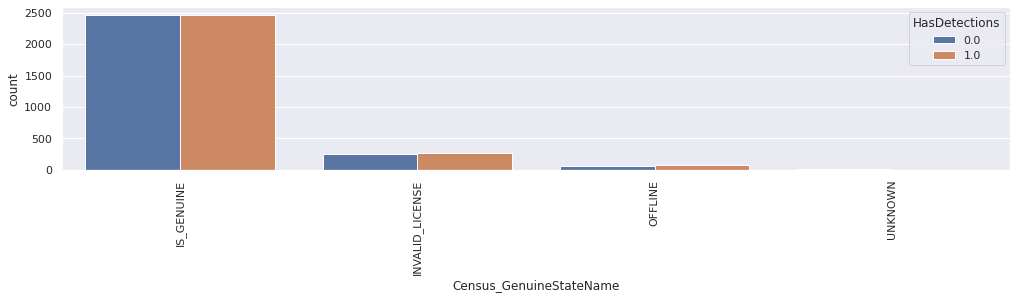

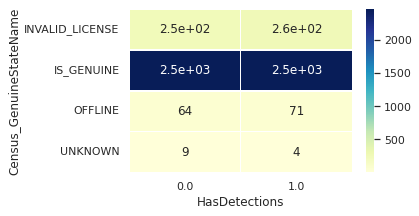



#######################
#
#	 Census_ActivationChannel
#
#########





Census_ActivationChannel
Retail                              3010
OEM:DM                              2114
Volume:GVLK                          258
OEM:NONSLP                           199
Volume:MAK                             3
Retail:TB:Eval                         2

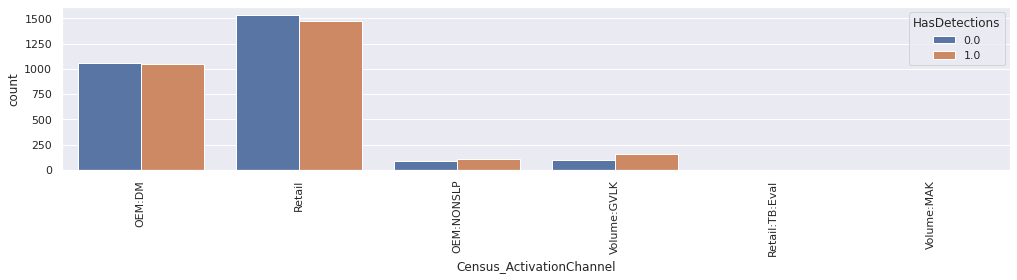

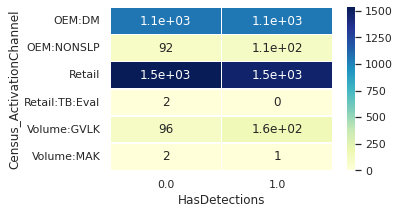



#######################
#
#	 Census_FlightRing
#
#########





Census_FlightRing
Retail                 5251
NOT_SET                 173
Unknown                 148
WIS                       7
WIF                       3
Disabled                  2
RP                        2

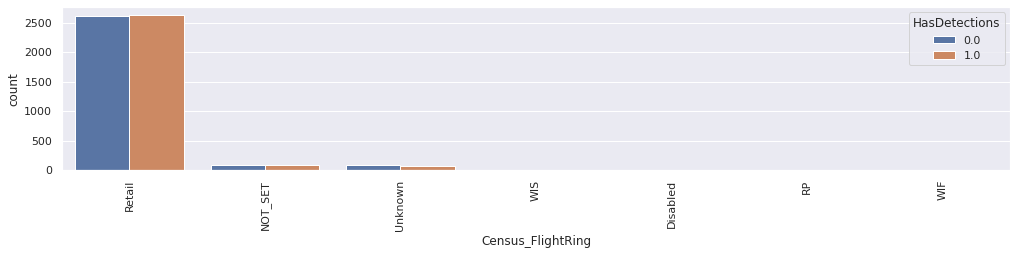

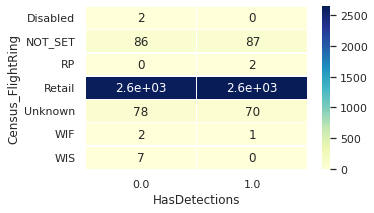



#######################
#
#	 Census_FirmwareManufacturerIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_FirmwareManufacturerIdentifier
8427007                                 355.0
8829090                                 486.0
2731904                                 554.0
1359513                                 142.0
236059                                  355.0
3771983                                 355.0
4833329                                 628.0
985557                                    zzz
387390                                  355.0
7131823                                 512.0



#######################
#
#	 Census_FirmwareVersionIdentifier
#
#########



	#######################
	##	 Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente 
	e#########



Census_FirmwareVersionIdentifier
8427007                          19951.0
8829090                          48753.0
2731904                          33111.0
1359513                          48473.0
236059                            4343.0
3771983                          19973.0
4833329                           8712.0
985557                               zzz
387390                           20106.0
7131823                          63370.0



#######################
#
#	 Wdft_RegionIdentifier
#
#########





Wdft_RegionIdentifier
10.0                   1195
3.0                     835
11.0                    807
1.0                     756
15.0                    637
7.0                     352
zzz                     176
8.0                     167
13.0                    151
5.0                     130
6.0                     117
12.0                     97
4.0                      83
9.0                      41
2.0                      39
14.0                      3

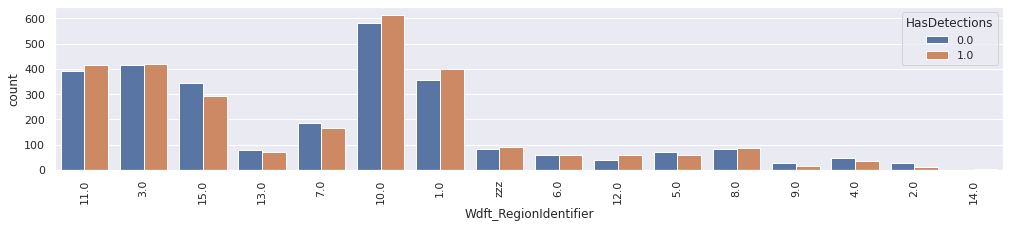

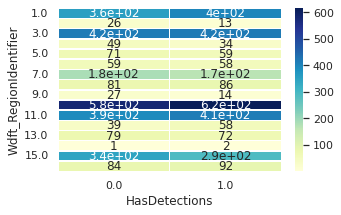

In [ ]:

def categoricWisdom(data,target,boolean_columns):
  
  categoric_columns = data.loc[:, ~data.columns.isin(boolean_columns)].select_dtypes(include=['object']).columns.array 

  for categoric_column in categoric_columns:
    
    print("\n\n#######################\n#\n#\t " + categoric_column + "\n#\n#########\n")
    
    print("\n")
    
    ### first we fill na values with a null cat
    data[categoric_column]=data[categoric_column].fillna("zzz")
    if data[categoric_column].value_counts().size<=20 :
      display(pd.DataFrame(data[categoric_column].value_counts()))
      plt.figure(figsize=[17,3])
      plt.xticks(rotation=90)
      sns.countplot(data=data, x=categoric_column, hue=target)
      plt.show()
      # Creating crosstab
      crosstb = pd.crosstab(data[categoric_column], data[target])
      # Draw a heatmap with the numeric values in each cell
      f, ax = plt.subplots(1,1,figsize=(5, 3))
      sns.heatmap(crosstb, annot=True, linewidths=.5,cmap="YlGnBu", ax=ax)
      plt.show()
    else :
      print("\t#######################\n\t##\t Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente \n\te#########\n")
      display(data[[categoric_column]].head(10))
      
    
categoricWisdom(data,TARGET,boolean_columns)  

In [ ]:
data["DefaultBrowsersIdentifier"].unique()

array(['zzz', 146.0, 773.0, 223.0, 1160.0, 2168.0, 239.0, 1632.0, 351.0,
       2273.0, 1910.0, 1066.0, 2725.0, 1623.0, 1161.0, 788.0, 1078.0,
       1207.0, 352.0, 2550.0, 2987.0, 1727.0, 645.0, 1622.0, 2290.0,
       3176.0, 890.0, 2952.0, 139.0, 230.0, 721.0, 608.0, 1536.0, 1823.0,
       508.0, 2064.0, 1071.0, 2724.0, 3195.0, 1079.0, 1628.0, 614.0,
       1616.0, 168.0, 2169.0, 2291.0, 666.0, 2170.0, 2712.0, 3163.0,
       339.0, 597.0, 468.0, 2434.0, 1351.0, 1240.0, 1926.0, 2373.0,
       2388.0, 883.0, 2726.0, 1991.0, 549.0, 2182.0], dtype=object)

#### Conclusión variables categóricas.

Aunque en algunas categóricas se observa ligeras variaciones que pondrían indicar cierta correlación, no son suficientemente claras .



### 2.2.3. Distribuición del target en relación a variables booleanas

Aplicamos la misma lógica a la variables booleanas
*   **Rellenamos nulos con valor ZZZ**
*   **El análisis es igual para todos, considerando que el máximo de valores son 3**





#######################
#
#	 IsSxsPassiveMode
#
#########





IsSxsPassiveMode
0.0              5480
1.0               106

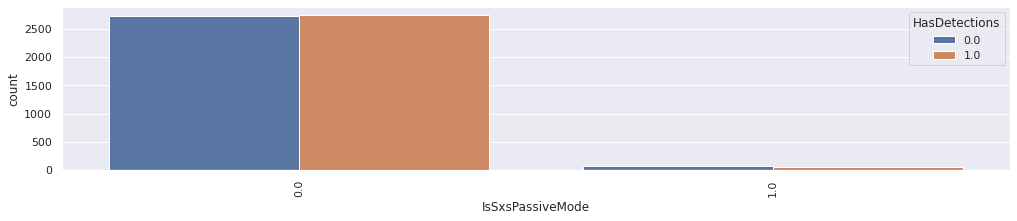

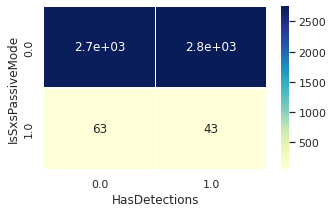



#######################
#
#	 AVProductsEnabled
#
#########





AVProductsEnabled
1.0               5428
2.0                125
zzz                 19
0.0                 10
3.0                  4

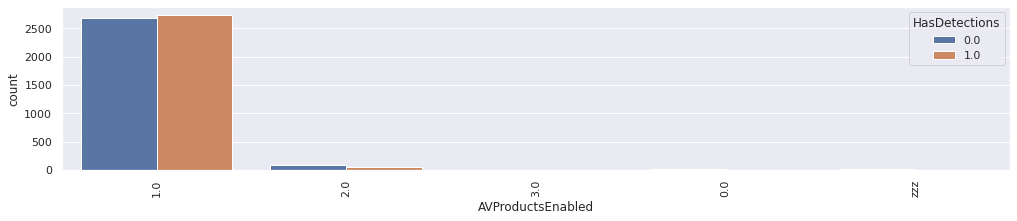

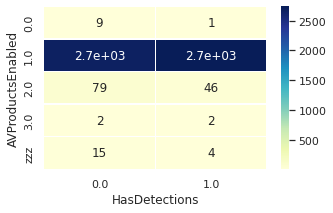



#######################
#
#	 HasTpm
#
#########





HasTpm
1.0    5528
0.0      58

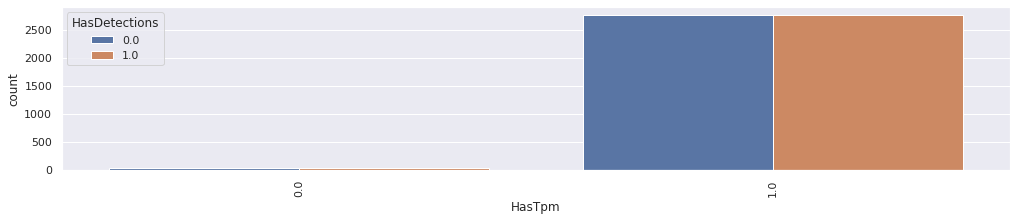

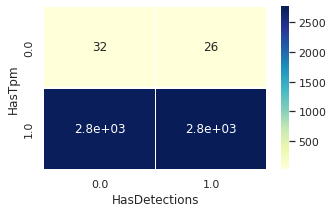



#######################
#
#	 IsProtected
#
#########





IsProtected
1.0         5275
0.0          292
zzz           19

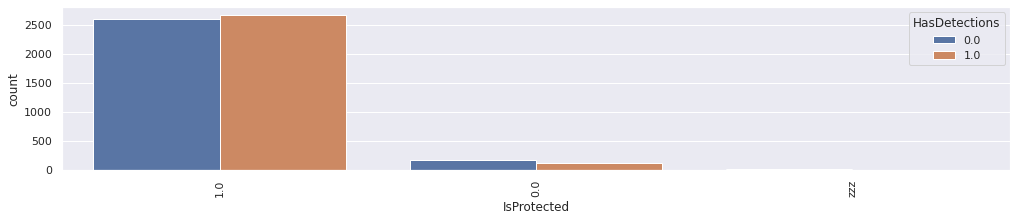

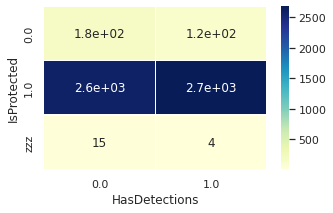



#######################
#
#	 SMode
#
#########





SMode
0.0   5262
zzz    323
1.0      1

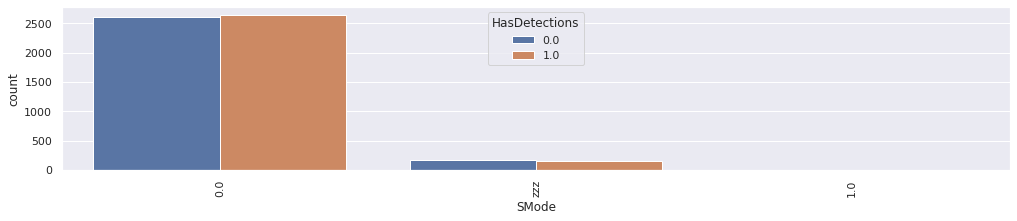

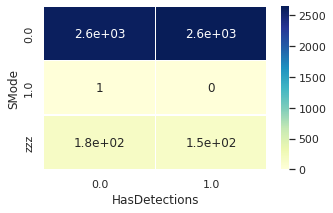



#######################
#
#	 Firewall
#
#########





Firewall
1.0      5423
0.0       116
zzz        47

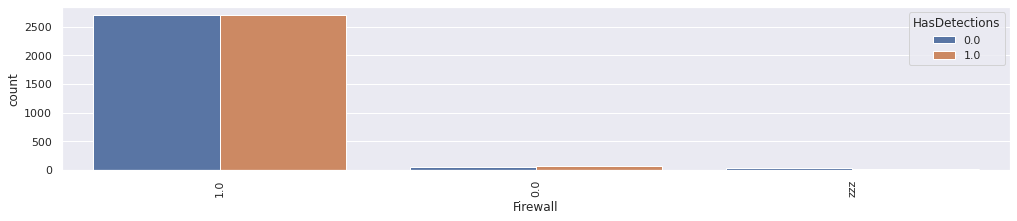

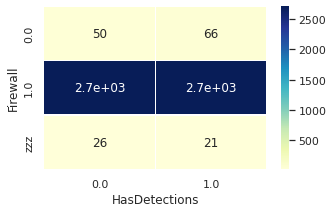



#######################
#
#	 UacLuaenable
#
#########





UacLuaenable
1.0          5557
0.0            25
zzz             4

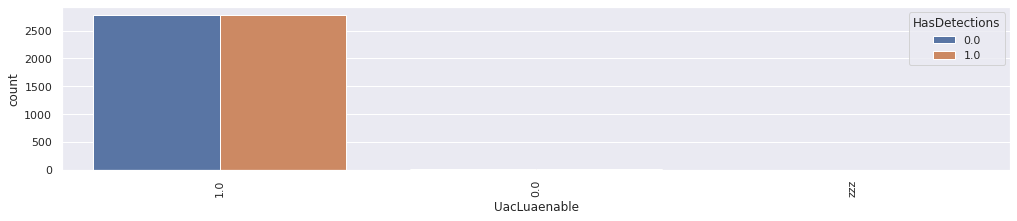

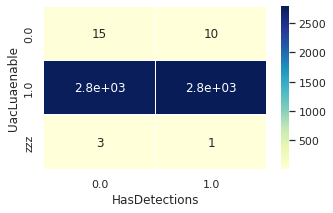



#######################
#
#	 Census_HasOpticalDiskDrive
#
#########





Census_HasOpticalDiskDrive
0.0                        5181
1.0                         405

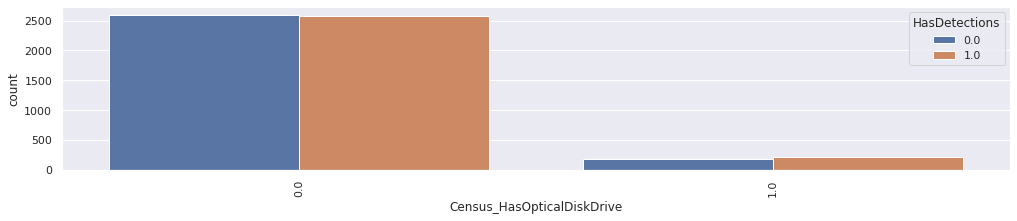

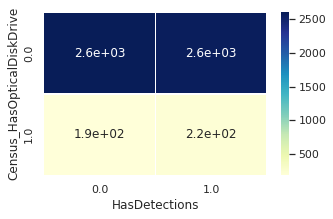



#######################
#
#	 Census_IsPortableOperatingSystem
#
#########





Census_IsPortableOperatingSystem
0.0                              5584
1.0                                 2

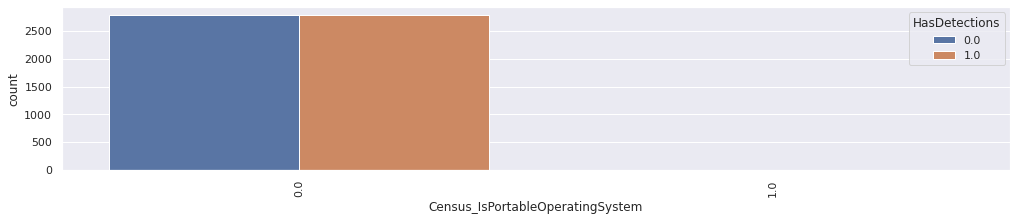

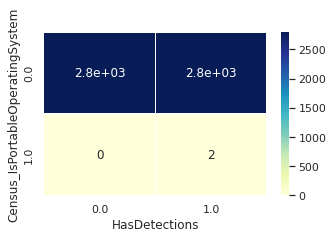



#######################
#
#	 Census_IsSecureBootEnabled
#
#########





Census_IsSecureBootEnabled
0.0                        2896
1.0                        2690

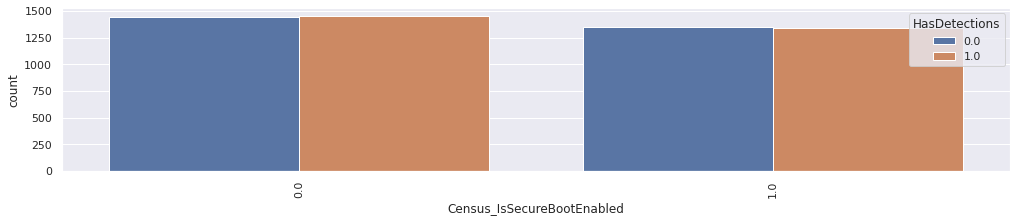

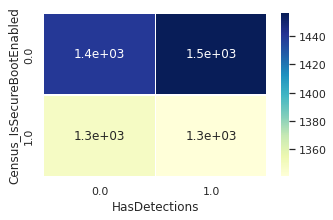



#######################
#
#	 Census_IsVirtualDevice
#
#########





Census_IsVirtualDevice
0.0                    5540
1.0                      36
zzz                      10

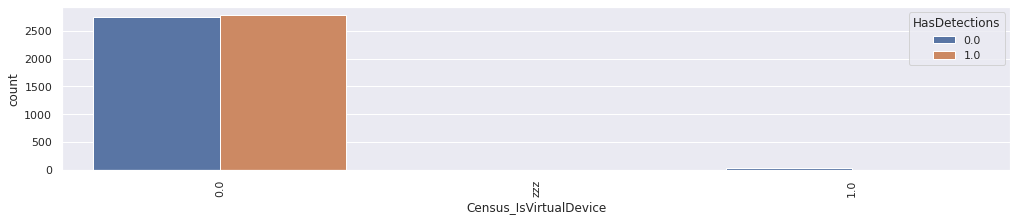

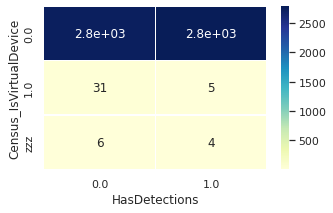



#######################
#
#	 Census_IsTouchEnabled
#
#########





Census_IsTouchEnabled
0.0                   4897
1.0                    689

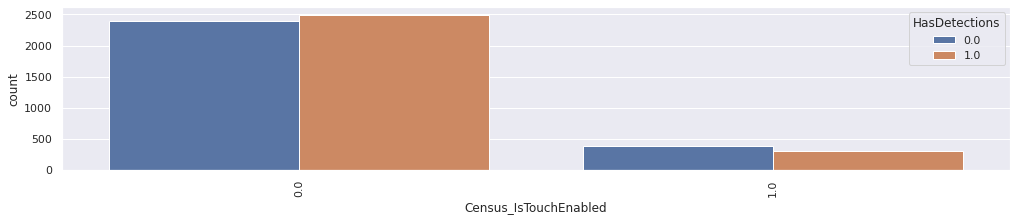

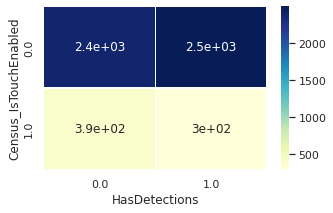



#######################
#
#	 Census_IsPenCapable
#
#########





Census_IsPenCapable
0.0                 5380
1.0                  206

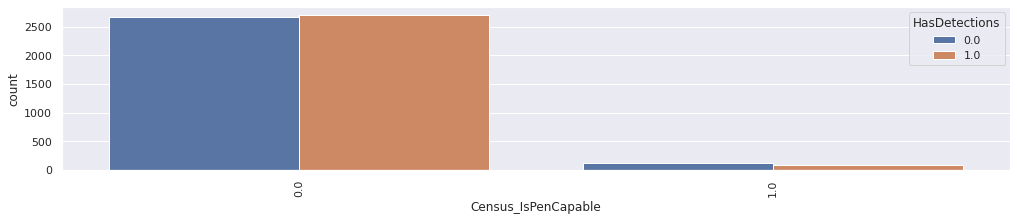

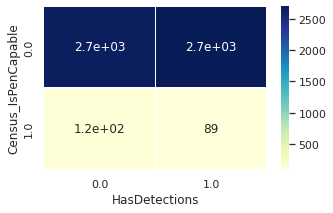



#######################
#
#	 Census_IsAlwaysOnAlwaysConnectedCapable
#
#########





Census_IsAlwaysOnAlwaysConnectedCapable
0.0                                     5234
1.0                                      294
zzz                                       58

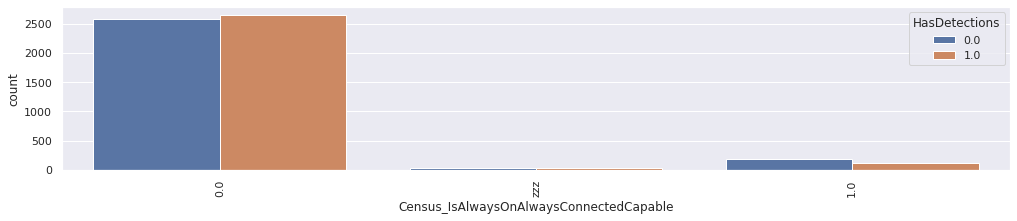

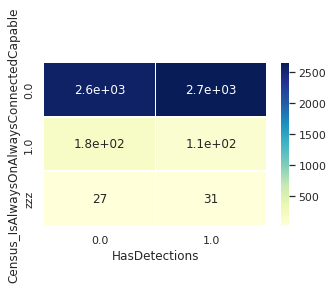



#######################
#
#	 Wdft_IsGamer
#
#########





Wdft_IsGamer
0.0          3881
1.0          1529
zzz           176

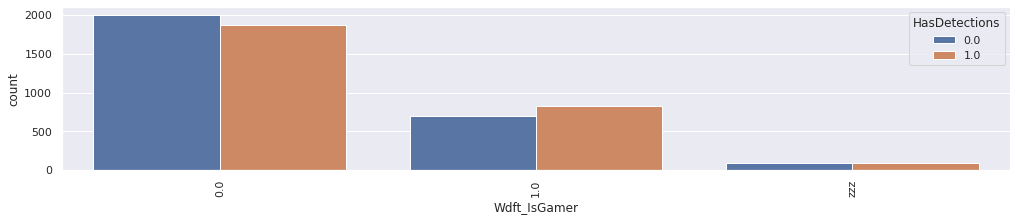

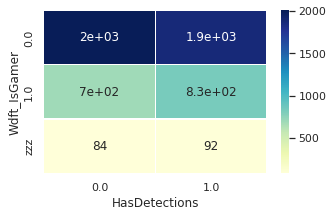



#######################
#
#	 HasDetections
#
#########





HasDetections
1.0           2797
0.0           2789

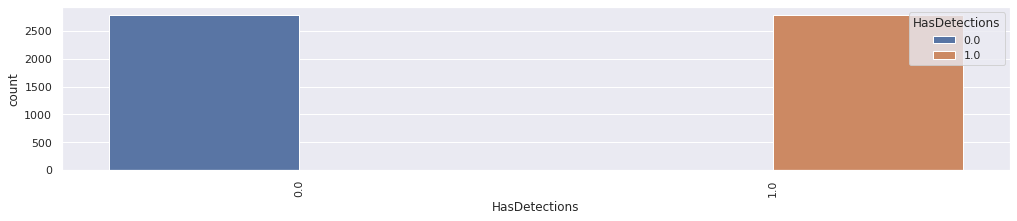

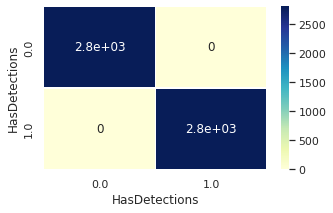

In [ ]:

def booleanWisdom(data,target,boolean_columns):
  
  boolean_columns = data.loc[:, data.columns.isin(boolean_columns)].select_dtypes(include=['object']).columns.array 

  for boolean_column in boolean_columns:
    
    print("\n\n#######################\n#\n#\t " + boolean_column + "\n#\n#########\n")
    
    print("\n")
    
    ### first we fill na values with a null cat
    data[boolean_column]=data[boolean_column].fillna("zzz")
    if data[boolean_column].value_counts().size<=20 :
      display(pd.DataFrame(data[boolean_column].value_counts()))
      plt.figure(figsize=[17,3])
      plt.xticks(rotation=90)
      sns.countplot(data=data, x=boolean_column, hue=target)
      plt.show()
      # Creating crosstab
      crosstb = pd.crosstab(data[boolean_column], data[target])
      # Draw a heatmap with the numeric values in each cell
      f, ax = plt.subplots(1,1,figsize=(5, 3))
      sns.heatmap(crosstb, annot=True, linewidths=.5,cmap="YlGnBu", ax=ax)
      plt.show()
    else :
      print("\t#######################\n\t##\t Probablemente tenga un orden númerico o contiene demasiados valores para ser analizado gráficamente \n\te#########\n")
      display(data[[boolean_column,target]].head(10))
      
    
booleanWisdom(data,TARGET,boolean_columns)  

#### Conclusión variables booleanas.

Aunque en algunas booleanas se observan ligeras variaciones que pondrían indicar cierta correlación, no son suficientemente claras .



# MLC 3: Data Preparation

## 3.1. Variables categóricas y booleanas

Para variables categóricas y booleanas, aplicamos la misma lógica de conversión:
*   Aplicamos one hot encoding si son menos de X valores
*   Aplicamos una transformación ordenada si identificamos un orden
*   Aplicamos fr3quency encoding si son más valores y no tienen orden



In [ ]:
# Primero definimos nuestras agrupaciones en base al análisis visual

alphabetical_order = ["EngineVersion","AppVersion","AvSigVersion","OsBuildLab","IeVerIdentifier","Census_OSVersion","Census_OSBuildRevision"]

limit_to_frequency_encoding = 100


In [ ]:
def sort_alph(dataframe, column_name):
  
    column_order = pd.DataFrame( columns = [column_name],data=sorted(dataframe[column_name].astype(str).unique()))
    column_order.reset_index()
    new_col_name = "num_"+ column_name
    
    
    column_order[new_col_name] = pd.Series(range(dataframe[column_name].unique().size))
    
    dataframe=pd.merge(dataframe,column_order, how='left', on=column_name)
    dataframe.reset_index()
    dataframe = dataframe.drop(column_name, axis=1) 
    
    dataframe[column_name] = dataframe[new_col_name]
    
    return dataframe

def generate_dummies(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    
    return dataframe.drop(column_name, axis=1)

def frequ(dataframe, column_name):
    enc_nom_1 = (dataframe.groupby(column_name).size()) / len(dataframe)
    
    new_col_name = "num_"+ column_name
    dataframe[new_col_name] = dataframe[column_name].apply(lambda x : enc_nom_1[x])
    dataframe = dataframe.drop(column_name, axis=1) 
    
    dataframe[column_name] = dataframe[new_col_name]
    return dataframe

def prepare_categoric_and_bool_data(data,alphabet_columns,limit_to_freq_enc):
  display(data.info(verbose=False))
  categoric_columns = data.select_dtypes(include=['object']).columns.array 

  for categoric_column in categoric_columns:
    if data[categoric_column].value_counts().size<=limit_to_freq_enc :
      data=generate_dummies(data,categoric_column)
    elif categoric_column in alphabet_columns:
      data=sort_alph(data,categoric_column)
    else:
      data=frequ(data,categoric_column)
  data.reset_index()
  display(data.info(verbose=False))
  
  return data

data_for_model=prepare_categoric_and_bool_data(data,alphabetical_order,limit_to_frequency_encoding)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586 entries, 8427007 to 390985
Columns: 77 entries, MachineIdentifier to HasDetections
dtypes: float64(26), object(51)
memory usage: 3.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586 entries, 0 to 5585
Columns: 617 entries, RtpStateBitfield to Wdft_RegionIdentifier_zzz
dtypes: float64(40), int64(6), uint8(571)
memory usage: 5.0 MB


None

# MLC 4: Model

## 4.1. Partición y muestreo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn import metrics
import graphviz

### 4.1. Partición entre development y validation

Para seleccionar nuestro validation debe parecerse lo máximo posible a la realidad.
Hemos visto que los datos están muy igualados en cuanto a infectado o no y en cuanto a repartición. Al no tener fechas cogeremos directamente valores partidos del propio dataset. El análisis de las variables muestra un dataset muy equilibrado y distribuido correctamente con la realidad por lo que una partición arbitraria nos podría valer en este caso.

In [ ]:
data_for_model.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586 entries, 0 to 5585
Columns: 617 entries, RtpStateBitfield to Wdft_RegionIdentifier_zzz
dtypes: float64(40), int64(6), uint8(571)
memory usage: 5.0 MB


In [ ]:
# ------------------------------------------------------
# separate the dates for train, validation and test

import math
total_length = int(len(data_for_model.index))

train_limit = math.floor(total_length * 0.6)
test_limit = math.floor(total_length * 0.8)

index_splitted = np.split(data_for_model.index, [train_limit, test_limit])

display(index_splitted)

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350],
            dtype='int64', length=3351),
 Int64Index([3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360,
             ...
             4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467],
            dtype='int64', length=1117),
 Int64Index([4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477,
             ...
             5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585],
            dtype='int64', length=1118)]

In [ ]:
train = data_for_model[data_for_model.index.isin(index_splitted[0])]
df_train_X = train.drop(TARGET,axis = 1)
df_train_Y = train[[TARGET]]
display(train.info(verbose=False))

valida = data_for_model[data_for_model.index.isin(index_splitted[2])]
display(valida.info(verbose=False))
df_valida_X = valida.drop(TARGET,axis = 1)
df_valida_Y = valida[[TARGET]]

test = data_for_model[data_for_model.index.isin(index_splitted[1])]
display(test.info(verbose=False))
df_test_X = test.drop(TARGET,axis = 1)
df_test_Y = test[[TARGET]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3350
Columns: 617 entries, RtpStateBitfield to Wdft_RegionIdentifier_zzz
dtypes: float64(40), int64(6), uint8(571)
memory usage: 3.0 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 4468 to 5585
Columns: 617 entries, RtpStateBitfield to Wdft_RegionIdentifier_zzz
dtypes: float64(40), int64(6), uint8(571)
memory usage: 1.0 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 3351 to 4467
Columns: 617 entries, RtpStateBitfield to Wdft_RegionIdentifier_zzz
dtypes: float64(40), int64(6), uint8(571)
memory usage: 1.0 MB


None

En la siguiente comparación vemos que los descriptivos son prácticamente iguales para train y test

In [ ]:
#compare train & test
display(df_train_X.describe().T.head())

display(df_test_X.describe().T.head())

display(df_train_Y.describe().T.head())

display(df_test_Y.describe().T.head())



count        mean        std       min   25%   50%  \
RtpStateBitfield     3351.0    6.817499   1.217202 -6.839986   7.0   7.0   
IsSxsPassiveMode     3351.0    0.017905   0.132626  0.000000   0.0   0.0   
AVProductsInstalled  3351.0    1.318828   0.521922  0.672175   1.0   1.0   
HasTpm               3351.0    0.989854   0.100231  0.000000   1.0   1.0   
CountryIdentifier    3351.0  109.799761  62.686723  2.000000  51.0  97.0   

                       75%    max  
RtpStateBitfield       7.0    8.0  
IsSxsPassiveMode       0.0    1.0  
AVProductsInstalled    2.0    5.0  
HasTpm                 1.0    1.0  
CountryIdentifier    164.0  222.0

count        mean        std       min   25%    50%  \
RtpStateBitfield     1117.0    6.673769   1.729093 -6.839986   7.0    7.0   
IsSxsPassiveMode     1117.0    0.022381   0.147987  0.000000   0.0    0.0   
AVProductsInstalled  1117.0    1.350676   0.544927  0.672175   1.0    1.0   
HasTpm               1117.0    0.989257   0.103137  0.000000   1.0    1.0   
CountryIdentifier    1117.0  111.575649  63.769374  2.000000  51.0  101.0   

                       75%    max  
RtpStateBitfield       7.0    8.0  
IsSxsPassiveMode       0.0    1.0  
AVProductsInstalled    2.0    4.0  
HasTpm                 1.0    1.0  
CountryIdentifier    164.0  222.0

count      mean       std  min  25%  50%  75%  max
HasDetections  3351.0  0.505222  0.500047  0.0  0.0  1.0  1.0  1.0

count      mean       std  min  25%  50%  75%  max
HasDetections  1117.0  0.476276  0.499661  0.0  0.0  0.0  1.0  1.0

### 4.2. Definición y entreno del modelo

In [ ]:
#instanciamos el modelo
dt = DecisionTreeClassifier(
    
    max_depth=6,#numero de preguntas
    min_samples_split=20, #numero maximo de observaciones
    min_samples_leaf=1,
    random_state=42

)

In [ ]:
# entrenamos el modelo

dt.fit(
    X=df_train_X,
    y=df_train_Y
)

DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)

In [ ]:
dot_data= export_graphviz(
    decision_tree=dt,
    out_file=None,
    feature_names=df_test_X.columns,
    class_names=["No infection","Infection"],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True,
    precision=3,
)

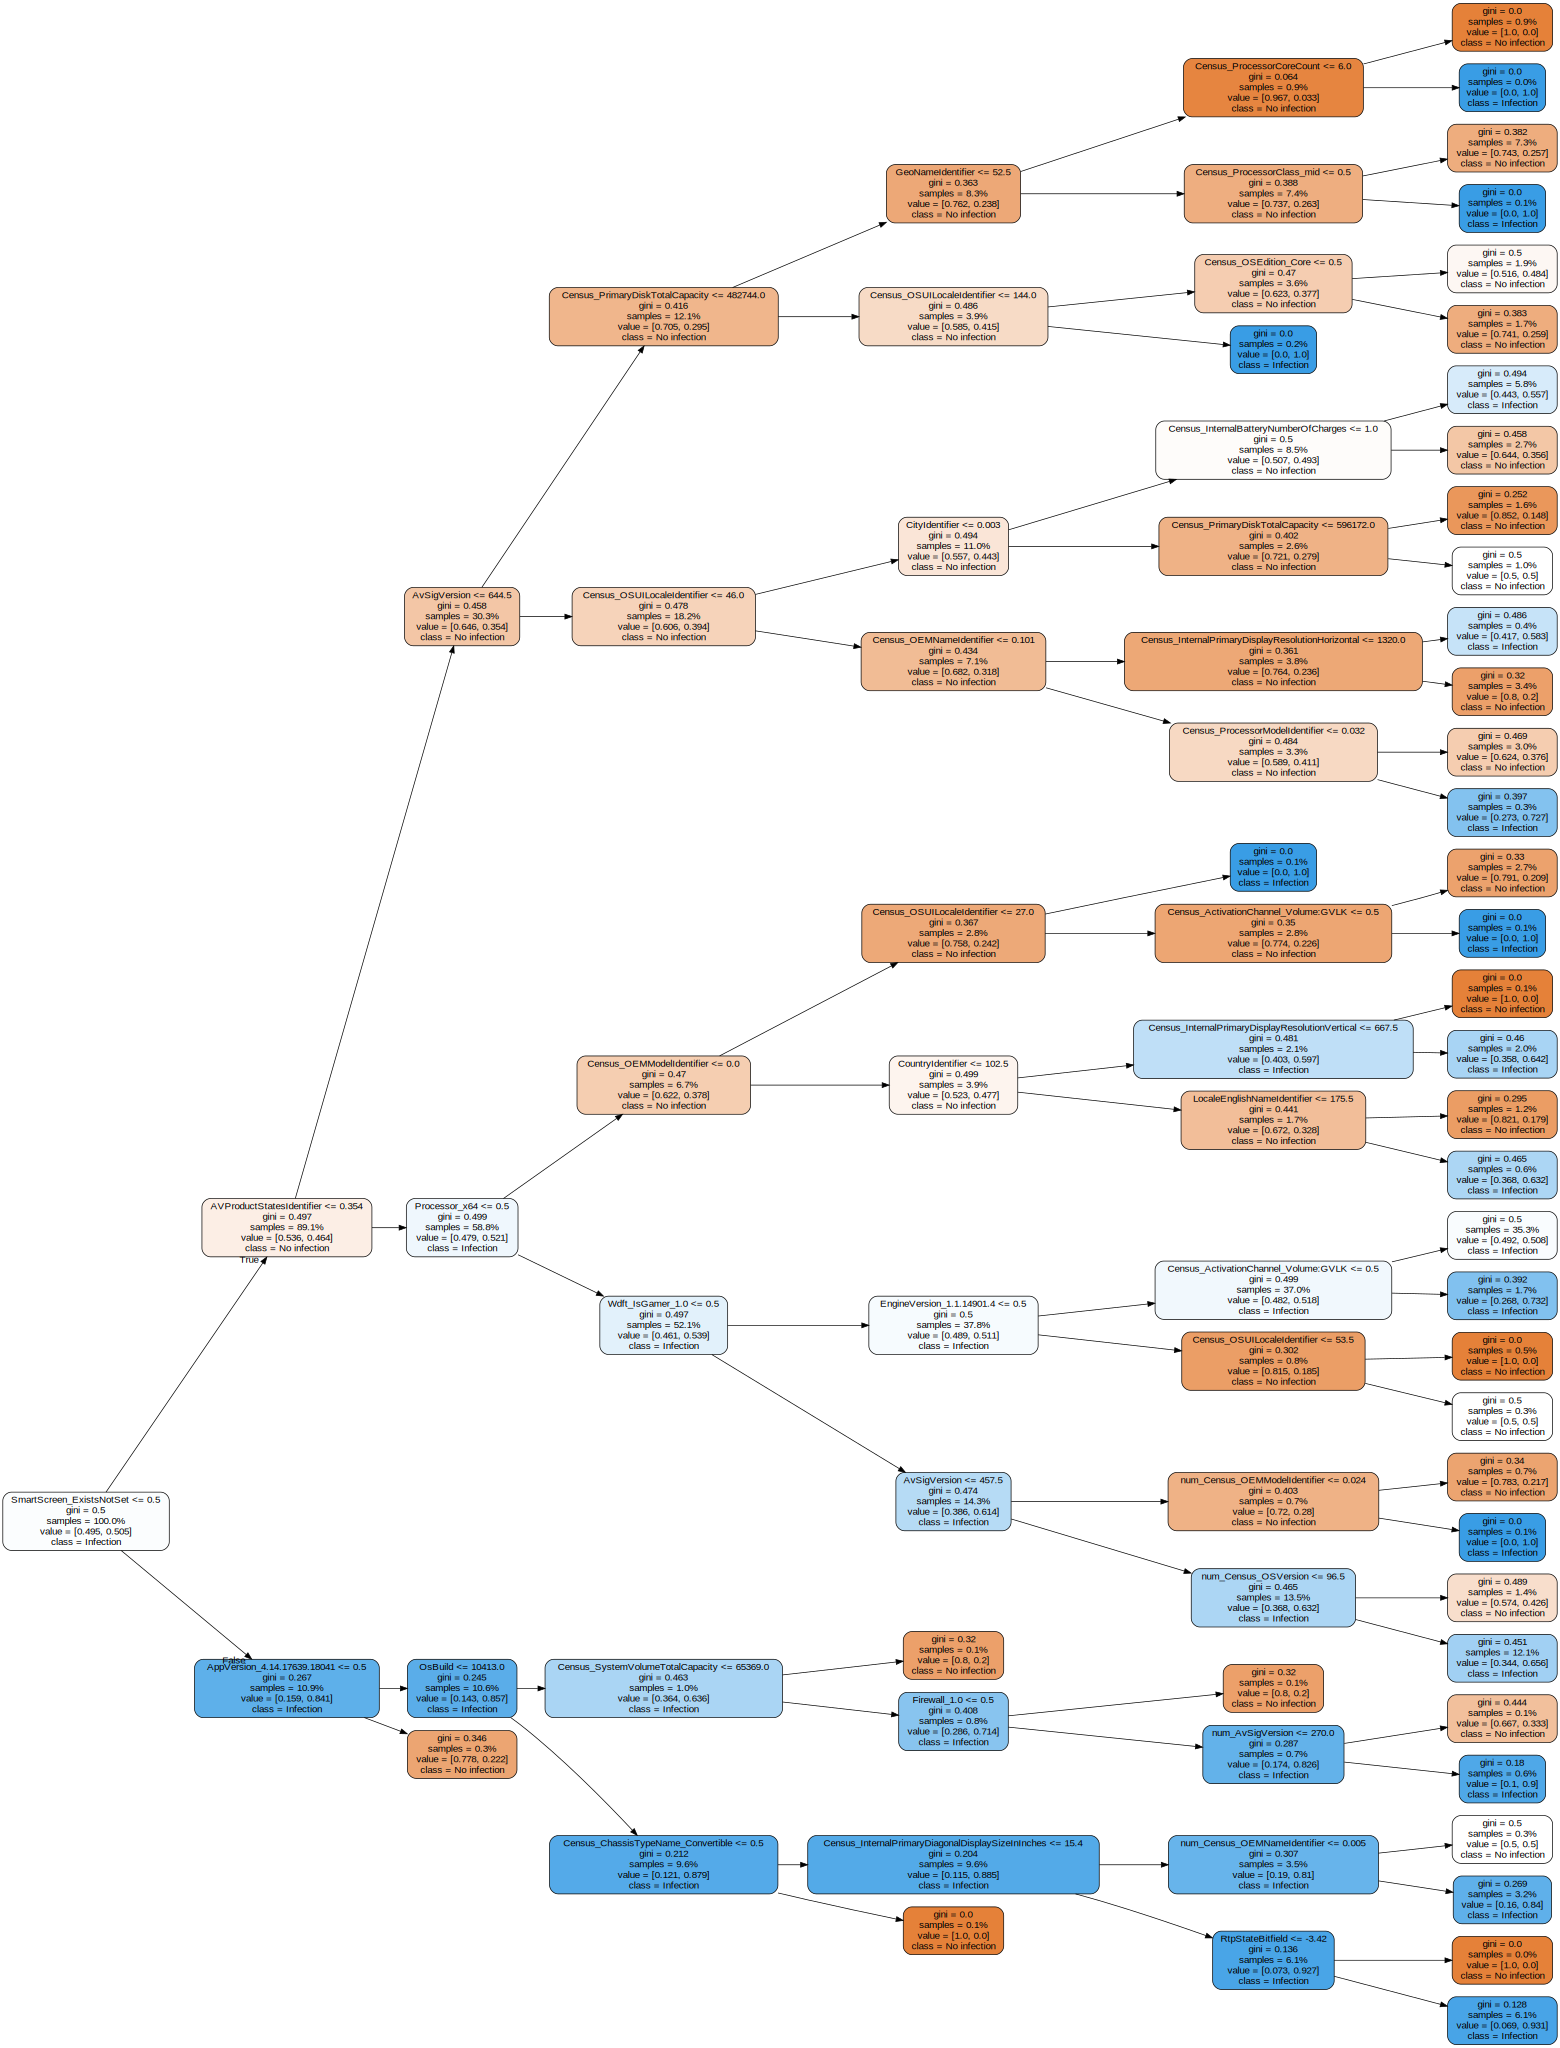

In [ ]:
graph = graphviz.Source(dot_data)
graph

### 4.2. Evaluación del modelo

In [ ]:
y_test_prediction=pd.DataFrame(dt.predict(df_test_X),index=df_test_Y.index,columns=["InfectionPred"])

In [ ]:
#comparamos
df_test_Y_aux = pd.DataFrame(df_test_Y)
display(df_test_Y_aux.head())
display(y_test_prediction.head())

results_df= df_test_Y_aux.join(y_test_prediction,how="inner")
display(results_df.head())

HasDetections
3351            0.0
3352            1.0
3353            0.0
3354            0.0
3355            0.0

InfectionPred
3351            1.0
3352            1.0
3353            1.0
3354            1.0
3355            1.0

HasDetections  InfectionPred
3351            0.0            1.0
3352            1.0            1.0
3353            0.0            1.0
3354            0.0            1.0
3355            0.0            1.0

In [ ]:
results_df["Succes"] = (results_df[TARGET] == results_df["InfectionPred"]).astype(int)
results_df.head()

HasDetections  InfectionPred  Succes
3351            0.0            1.0       0
3352            1.0            1.0       1
3353            0.0            1.0       0
3354            0.0            1.0       0
3355            0.0            1.0       0

In [ ]:
# accuracy del casi 60%, es un poco mejor que el 
# modelo tonto que rondaba el 50% , esto no es un modelo malo, es lo siguiente.
results_df["Succes"].mean()

0.5577439570277529

Matriz de confusión

No vemos mucha diferencia entre la predicción real 

In [ ]:
cnf_matrix= pd.crosstab(results_df[TARGET],results_df["InfectionPred"])
display(cnf_matrix)

InfectionPred  0.0  1.0
HasDetections          
0.0            225  360
1.0            134  398

In [ ]:
TP = cnf_matrix.iloc[1,1]
TN = cnf_matrix.iloc[0,0]
FP = cnf_matrix.iloc[0,1]
FN = cnf_matrix.iloc[1,0]

In [ ]:
accuracy= dt.score(df_test_X,df_test_Y)
Precision = TP/(TP+FP)

Recall = TP/(TP+FN)
display(Recall)

f1score= 2/(1/Precision+1/Recall)

auc =metrics.roc_auc_score(results_df[TARGET],results_df["InfectionPred"])

Dict = dict({"Precision": Precision, 'Recall' :Recall,'Accuracy' :accuracy* 100.0,"f1score":f1score,"auc":auc})
display(pd.DataFrame(Dict.items(),columns=["Metric","Result"]).set_index("Metric").reset_index())

0.7481203007518797

Metric     Result
0  Precision   0.525066
1     Recall   0.748120
2   Accuracy  55.774396
3    f1score   0.617054
4        auc   0.566368

Este AUC esta por debajo del 60%, un mal modelo, deberíamos tener cerca de un 80% de AUC 

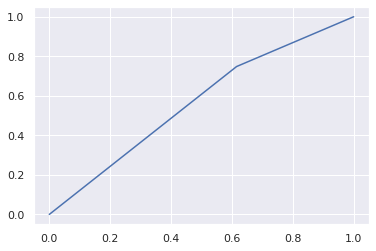

In [ ]:
fpr,tpr,th=metrics.roc_curve(df_test_Y,y_test_prediction)

plt.plot(fpr,tpr)

Solo un threehold, mal modelo

 Overfitting

In [ ]:
for i in range(1,20):
  dt = DecisionTreeClassifier(max_depth=i,random_state=42)
  dt.fit(df_train_X,df_train_Y)
  train_acc = dt.score(df_train_X,df_train_Y)
  test_acc = dt.score(df_test_X,df_test_Y)
  print("Profundidad del arbol:{}. Train: {}. Test: {}".format(i,train_acc,test_acc))


Profundidad del arbol:1. Train: 0.5690838555655028. Test: 0.5693822739480752
Profundidad del arbol:2. Train: 0.5950462548492987. Test: 0.5568487018800358
Profundidad del arbol:3. Train: 0.6120561026559236. Test: 0.567591763652641
Profundidad del arbol:4. Train: 0.6135481945687854. Test: 0.567591763652641
Profundidad del arbol:5. Train: 0.6299612056102656. Test: 0.5738585496866607
Profundidad del arbol:6. Train: 0.6469710534168904. Test: 0.55863921217547
Profundidad del arbol:7. Train: 0.6753207997612652. Test: 0.5863921217547001
Profundidad del arbol:8. Train: 0.6988958519844822. Test: 0.5953446732318711
Profundidad del arbol:9. Train: 0.7326171292151596. Test: 0.5908683974932856
Profundidad del arbol:10. Train: 0.7615637123246792. Test: 0.5899731423455685
Profundidad del arbol:11. Train: 0.7848403461653238. Test: 0.5926589077887198
Profundidad del arbol:12. Train: 0.8051327961802447. Test: 0.5774395702775291
Profundidad del arbol:13. Train: 0.8287078484034617. Test: 0.5792300805729633

In [ ]:
# yo diría que el valor óptimo son 6 preguntas, donde train y test son más parecidos
# El modelo es muy "tonto" , habría que revisar si las transformaciones aplicadas esta afectando a la precisión del modelo

## El resto lo haré fuera del master, no me da la vida Guillem :D